## TALENT SALARY PREDICTION

Prediksi Rentang Gaji Kandidat berdasarkan Informasi yang terdapat pada Curriculum Vitae (CV)

## DATA UNDERSTANDING

- ID - ID kandidat
- Current Position - Jabatan pekerjaan kandidat saat ini atau yang paling baru
- Targeted Position - Jenis peran yang dicari oleh kandidat.
- Total Working Experience - Total tahun pengalaman kerja profesional.
- Candidate Level - Tingkat senioritas kandidat yang telah dinilai.
- Domisili - Kota atau wilayah tempat tinggal kandidat.
- Education 1/2/3 - Riwayat pendidikan kandidat.
- Estimate Bottom - Batas bawah dari gaji bulanan yang diinginkan kandidat.
- Estimate Up - Batas atas dari gaji bulanan yang diinginkan kandidat.
- Expected Benefit... - Nilai moneter yang diharapkan dari tunjangan (rentang bawah dan atas).
- Notice Period - Waktu yang dibutuhkan kandidat untuk meninggalkan
- Tech Stack - Daftar keahlian teknis, alat, dan teknologi yang dipisahkan koma yang dikuasai kandidat
- Certification - Daftar sertifikasi atau pencapaian.
- Name - Nama lengkap kandidat.

## EXPLORATORY DATA ANALYSIS (EDA)

In [1]:
# Import Library utama yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')

In [3]:
# Menunjukkan 10 baris data terbawah
df.tail(10)

,ID,Current Position,Targeted Position,Total Working Experience,Candidate Level,Domisili,Education 1,Education 2,Education 3,Expected Benefit Botom,Expected Benefit Up,Notice Period,Tech Stack,Certification,Estimate Bottom,Estimate Up
1150,SKU-SONU334,SOFTWARE ENGINEER,NaN,5,Mid-Level,Tebet Jakarta Selatan,Institut Teknologi Del: Bachelor of Computer S...,NaN,NaN,0,0,NaN,"Golang, Java, PHP, My Sql, MongoDB, Postgresql...",[],12000000.0,18000000.0
1151,SKU-GONU1255,Golang Developer,NaN,6,Mid-Level,Medan,Universitas Mikroskil (2019 – 2024),SMK Tritech Informatika Medan (2014 – 2017),SMP Negeri 35 Medan (2011 - 2014),0,0,NaN,"Jira / Confluence, Git, Obsidian, Swagger, Gol...",[],8000000.0,12000000.0
1152,SKU-SONU470,Software Engineer,NaN,5,Mid-Level,Tangerang Selatan,Bachelor Degree Universitas Pamulang 2014 2020,Data Structures and Algorithms Specialization ...,CS50X - Introduction Computer Science Universi...,0,0,NaN,"Dart (Flutter), Rust, HTML, CSS, SQL",[],8000000.0,12000000.0
1153,SKU-QUQA122,Quality Assurance Tester,QA,2,Junior,Bandung,Universitas Islam Negeri Sunan Gunung Djati - ...,NaN,NaN,4500000,5000000,Immediately,"Postman, insomnia, cypres, excel, Gsheet, Jmet...",NaN,4000000.0,6000000.0
1154,SKU-ITNU1061,IT & Programmer Executive,NaN,19,Senior,Bandung,Bachelor Degree of Information Engineering Uni...,NaN,NaN,0,0,NaN,"VB.Net , Visual Basic, Visual Foxpro, ASP.Net ...",[],15000000.0,25000000.0
1155,SKU-FRNU1112,Frontend Developer,NaN,3,Mid-Level,"Bandung, West Java, Indonesia","Universitas Mahakarya Asia, Computer Science, ...","Pijar Camp, Fullstack Web Developer, May 2020",NaN,0,0,NaN,"HTML / CSS, TypeScript, JavaScript, Angular, R...",[],8000000.0,12000000.0
1156,SKU-FRNU1147,Front End Web Developer,NaN,1,Junior,"Bogor, Indonesia",Politeknik Negeri Media Kreatif - Diploma 4 Mu...,NaN,NaN,0,0,NaN,"Graphql, Typescript + React, HTML 5, CSS 3, Ja...","[""Belajar Dasar Pemrograman Web - Dicoding Aca...",6000000.0,9000000.0
1157,SKU-SONU1312,Software Engineer,NaN,3,Mid-Level,"Cibodas, Tangerang",Global Institute of Technology and Business - ...,NaN,NaN,0,0,NaN,"CSS, HTML, JAVASCRIPT, TYPESCRIPT, PHP, GO, LA...",[],8000000.0,12000000.0
1158,SKU-IONU877,iOS Developer,NaN,4,Mid-Level,"Pasuruan, Indonesia","Indonesian Computer University, Computer Engin...",NaN,NaN,0,0,NaN,"SwiftUI, UIKit, Core Data, Core Animation, Cor...",[],12000000.0,18000000.0
1159,SKU-FUNU1143,Full Stack Developer,NaN,3,Mid-Level,Kota Cirebon,"SMKS Wahidin Kota Cirebon - Kota Cirebon, Jawa...",NaN,NaN,0,0,NaN,"Laravel, Next.js, CodeIgniter3, Javascript, No...","[""Sertifikat Kompetensi Pemograman Komputer"",""...",8000000.0,12000000.0


In [4]:
# Ukuran Dimensi Dataset
print("Ukuran Data:", df.shape)

print("\nInformasi tentang kolom, jumlah nilai non-null, tipe data:")
df.info()

Ukuran Data: (1160, 16)

Informasi tentang kolom, jumlah nilai non-null, tipe data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1160 entries, 0 to 1159
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        1160 non-null   object 
 1   Current Position          1019 non-null   object 
 2   Targeted Position         202 non-null    object 
 3   Total Working Experience  1160 non-null   int64  
 4   Candidate Level           1160 non-null   object 
 5   Domisili                  1061 non-null   object 
 6   Education 1               1142 non-null   object 
 7   Education 2               531 non-null    object 
 8   Education 3               129 non-null    object 
 9   Expected Benefit Botom    1160 non-null   int64  
 10  Expected Benefit Up       1160 non-null   int64  
 11  Notice Period             57 non-null     object 
 12  Tech Stack                1155 non

In [5]:
# Memilih nama kolom dengan tipe data numerik (int, float)
num_cols = df.select_dtypes(include=[np.number]).columns

# Memilih nama kolom dengan tipe data kategorikal (objek)
cat_cols = df.select_dtypes(include=['object', ]).columns

print("Kolom-kolom numerik:", num_cols)
print("Kolom-kolom kategorikal:", cat_cols)

Kolom-kolom numerik: Index(['Total Working Experience', 'Expected Benefit Botom',
       'Expected Benefit Up', 'Estimate Bottom', 'Estimate Up'],
      dtype='object')
Kolom-kolom kategorikal: Index(['ID', 'Current Position', 'Targeted Position', 'Candidate Level',
       'Domisili', 'Education 1', 'Education 2', 'Education 3',
       'Notice Period', 'Tech Stack', 'Certification'],
      dtype='object')


In [6]:
# Menunjukkan statistika deskriptif pada kolom numerik
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Total Working Experience,1160.0,3.126724e+00,2.830618e+00,0.0,1.0,3.0,4.0,19.0
Expected Benefit Botom,1160.0,4.212931e+05,2.148195e+06,0.0,0.0,0.0,0.0,21500000.0
Expected Benefit Up,1160.0,1.681897e+05,1.413114e+06,0.0,0.0,0.0,0.0,23000000.0
Estimate Bottom,1160.0,7.602155e+06,3.705119e+06,2500000.0,5000000.0,8000000.0,8000000.0,35000000.0
Estimate Up,1160.0,1.182543e+07,6.002688e+06,4000000.0,8000000.0,12000000.0,12000000.0,55000000.0


In [7]:
# Menunjukkan statistika deskriptif pada kolom kategorikal
df[cat_cols].describe().T

,count,unique,top,freq
ID,1160,1160,SKU-FUNU1143,1
Current Position,1019,549,Full Stack Developer,43
Targeted Position,202,21,Backend Developer,55
Candidate Level,1160,5,Mid-Level,652
Domisili,1061,436,Bandung,94
Education 1,1142,1122,"SMK Merdeka Bandung, Teknik Komputer dan Jarin...",2
Education 2,531,519,"SMK Negeri 6 Balikpapan, Teknik Komputer dan J...",2
Education 3,129,124,SMA TARUNA ANDIGHA OCT 2018 - DES 2018,2
Notice Period,57,17,Immediately,18
Tech Stack,1155,1144,"Jetpack Compose, Kotlin, Java, C #, PHP, CodeI...",2


In [8]:
# Memeriksa konsistensi nilai antara estimate bottom dengan estimate up
inconsistent = df[df['Estimate Bottom'] > df['Estimate Up']]
print("Jumlah kasus tidak konsisten:", len(inconsistent))
print(inconsistent[['Estimate Bottom','Estimate Up']])

Jumlah kasus tidak konsisten: 0
Empty DataFrame
Columns: [Estimate Bottom, Estimate Up]
Index: []


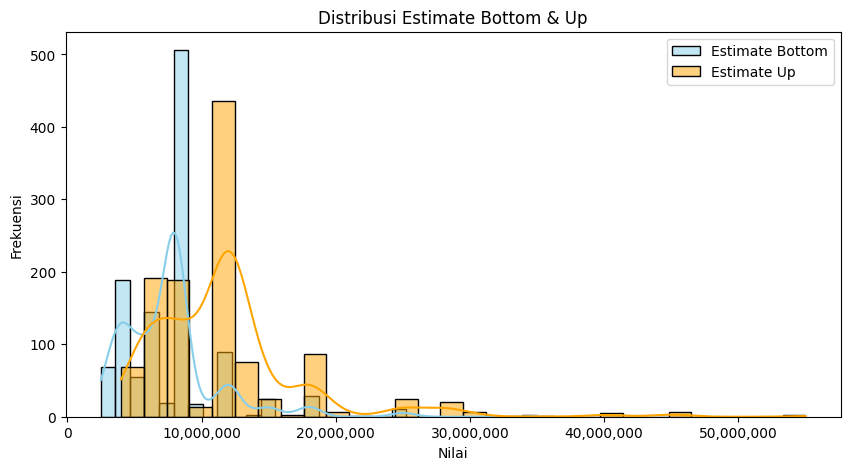

In [9]:
plt.figure(figsize=(10,5))
sns.histplot(df['Estimate Bottom'], bins=30, kde=True, color='skyblue', label='Estimate Bottom')
sns.histplot(df['Estimate Up'], bins=30, kde=True, color='orange', label='Estimate Up')
plt.title('Distribusi Estimate Bottom & Up')
plt.xlabel('Nilai')
plt.ylabel('Frekuensi')
plt.legend()

# Format x-axis agar pakai angka biasa
plt.gca().xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))  # menampilkan dengan koma
plt.show()

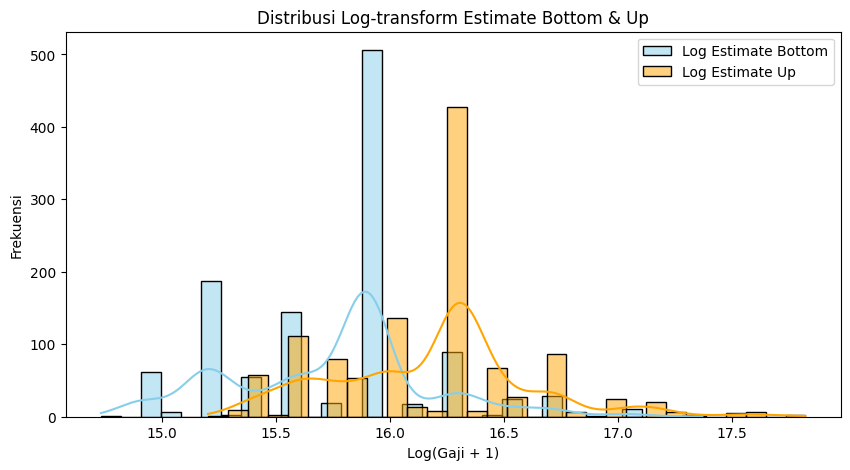

In [10]:
plt.figure(figsize=(10,5))
sns.histplot(np.log1p(df['Estimate Bottom']), bins=30, kde=True, color='skyblue', label='Log Estimate Bottom')
sns.histplot(np.log1p(df['Estimate Up']), bins=30, kde=True, color='orange', label='Log Estimate Up')
plt.title('Distribusi Log-transform Estimate Bottom & Up')
plt.xlabel('Log(Gaji + 1)')
plt.ylabel('Frekuensi')
plt.legend()
plt.show()

count    1.160000e+03
mean     4.223276e+06
std      2.389070e+06
min      1.500000e+06
25%      3.000000e+06
50%      4.000000e+06
75%      4.000000e+06
max      2.000000e+07
Name: Estimate_Range, dtype: float64


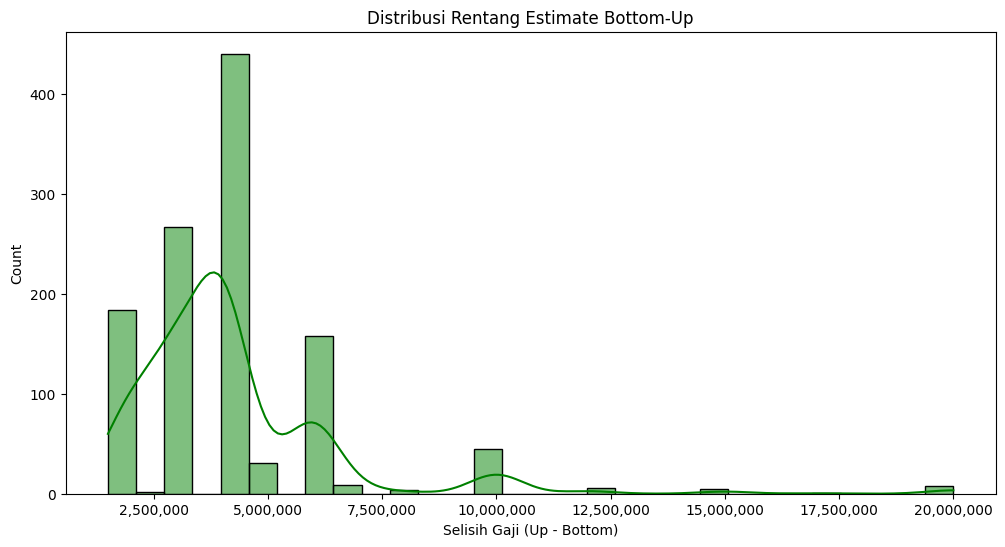

In [11]:
df['Estimate_Range'] = df['Estimate Up'] - df['Estimate Bottom']

# Statistik rentang
print(df['Estimate_Range'].describe())

# Visualisasi
plt.figure(figsize=(12,6))
sns.histplot(df['Estimate_Range'], bins=30, kde=True, color='green')
plt.gca().xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.title('Distribusi Rentang Estimate Bottom-Up')
plt.xlabel('Selisih Gaji (Up - Bottom)')
plt.show()

Statistika Deskriptif pada fitur estimate bottom:
 count    1.160000e+03
mean     7.602155e+06
std      3.705119e+06
min      2.500000e+06
25%      5.000000e+06
50%      8.000000e+06
75%      8.000000e+06
max      3.500000e+07
Name: Estimate Bottom, dtype: float64

Statistika Deskriptif pada fitur estimate up:
 count    1.160000e+03
mean     1.182543e+07
std      6.002688e+06
min      4.000000e+06
25%      8.000000e+06
50%      1.200000e+07
75%      1.200000e+07
max      5.500000e+07
Name: Estimate Up, dtype: float64


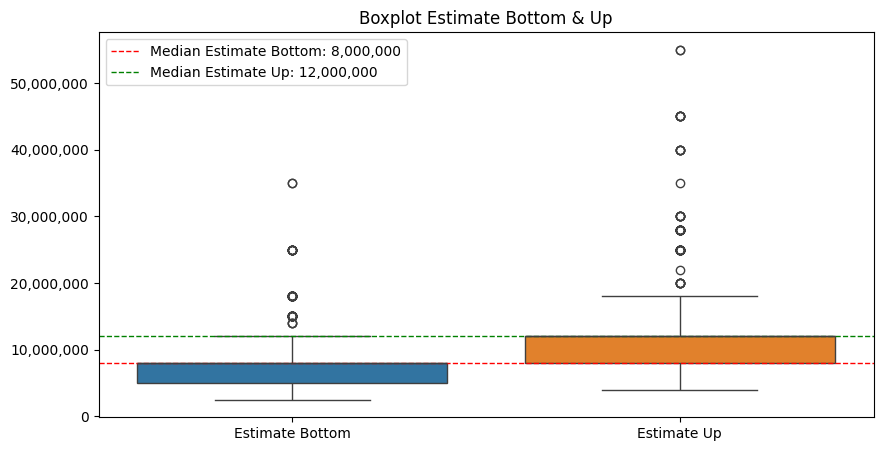

In [12]:
# Membuat boxplot fitur estimate bottom & up
print( "Statistika Deskriptif pada fitur estimate bottom:\n", df['Estimate Bottom'].describe())
print("\nStatistika Deskriptif pada fitur estimate up:\n", df['Estimate Up'].describe())
plt.figure(figsize=(10,5))
sns.boxplot(df[['Estimate Bottom', 'Estimate Up']])
plt.title('Boxplot Estimate Bottom & Up')
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

# Menghitung median fitur estimate bottom & upa
median_bottom = df['Estimate Bottom'].median()
median_up = df['Estimate Up'].median()

# Menambahkan garis horizontal median
plt.axhline(median_bottom, color='red', linestyle='dashed', linewidth=1, label=f'Median Estimate Bottom: {median_bottom:,.0f}')
plt.axhline(median_up, color='green', linestyle='dashed', linewidth=1, label=f'Median Estimate Up: {median_up:,.0f}')

plt.legend()
plt.show()

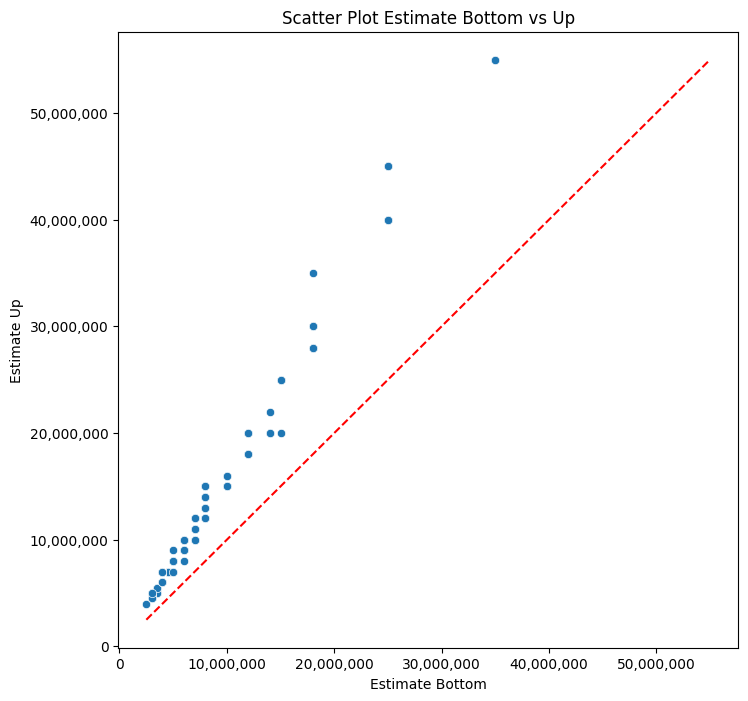

In [13]:
# Melihat korelasi antara fitur estimate bottom & up
plt.figure(figsize=(8,8))
sns.scatterplot(x='Estimate Bottom', y='Estimate Up', data=df)
plt.plot([df['Estimate Bottom'].min(), df['Estimate Up'].max()],
         [df['Estimate Bottom'].min(), df['Estimate Up'].max()], color='red', linestyle='--')  # garis y=x
plt.gca().xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.title('Scatter Plot Estimate Bottom vs Up')
plt.xlabel('Estimate Bottom')
plt.ylabel('Estimate Up')
plt.show()

In [14]:
# Menghitung jumlah missing values pada setiap fitur
sum_missing_values = df.isnull().sum()
print("Jumlah Missing Values pada Fitur:\n")
print(sum_missing_values)

Jumlah Missing Values pada Fitur:

ID                             0
Current Position             141
Targeted Position            958
Total Working Experience       0
Candidate Level                0
Domisili                      99
Education 1                   18
Education 2                  629
Education 3                 1031
Expected Benefit Botom         0
Expected Benefit Up            0
Notice Period               1103
Tech Stack                     5
Certification                359
Estimate Bottom                0
Estimate Up                    0
Estimate_Range                 0
dtype: int64


In [15]:
# Menghitung persentase missing values pada setiap fitur
percent_missing_values = df.isnull().sum()/len(df)*100
print("Persentase Missing Values pada Fitur:\n")
print(percent_missing_values)

print("\nBerdasarkan data di atas, kita dapat menghapus/drop fitur-fitur yang memiliki persentase missing values di atas 60% yaitu Targeted Position, Education 3, dan Notice Period")

Persentase Missing Values pada Fitur:

ID                           0.000000
Current Position            12.155172
Targeted Position           82.586207
Total Working Experience     0.000000
Candidate Level              0.000000
Domisili                     8.534483
Education 1                  1.551724
Education 2                 54.224138
Education 3                 88.879310
Expected Benefit Botom       0.000000
Expected Benefit Up          0.000000
Notice Period               95.086207
Tech Stack                   0.431034
Certification               30.948276
Estimate Bottom              0.000000
Estimate Up                  0.000000
Estimate_Range               0.000000
dtype: float64

Berdasarkan data di atas, kita dapat menghapus/drop fitur-fitur yang memiliki persentase missing values di atas 60% yaitu Targeted Position, Education 3, dan Notice Period


In [16]:
df[['Expected Benefit Botom','Expected Benefit Up', 'Estimate Bottom', 'Estimate Up']].describe()

,Expected Benefit Botom,Expected Benefit Up,Estimate Bottom,Estimate Up
count,1.160000e+03,1.160000e+03,1.160000e+03,1.160000e+03
mean,4.212931e+05,1.681897e+05,7.602155e+06,1.182543e+07
std,2.148195e+06,1.413114e+06,3.705119e+06,6.002688e+06
min,0.000000e+00,0.000000e+00,2.500000e+06,4.000000e+06
25%,0.000000e+00,0.000000e+00,5.000000e+06,8.000000e+06
50%,0.000000e+00,0.000000e+00,8.000000e+06,1.200000e+07
75%,0.000000e+00,0.000000e+00,8.000000e+06,1.200000e+07
max,2.150000e+07,2.300000e+07,3.500000e+07,5.500000e+07


In [17]:
df['Expected Benefit Botom'].value_counts()

,count
Expected Benefit Botom,
0,1110
6500000,5
5000000,4
8500000,4
13000000,4
11000000,4
6000000,4
10000000,3
15000000,3


In [18]:
df['Expected Benefit Up'].value_counts()

,count
Expected Benefit Up,
0,1141
6000000,3
12000000,3
7000000,3
14000000,2
23000000,1
8000000,1
9000000,1
10000000,1


Statistika Deskriptif pada Kolom Numerik:



,count,mean,std,min,25%,50%,75%,max
Total Working Experience,1160.0,3.126724e+00,2.830618e+00,0.0,1.0,3.0,4.0,19.0
Expected Benefit Botom,1160.0,4.212931e+05,2.148195e+06,0.0,0.0,0.0,0.0,21500000.0
Expected Benefit Up,1160.0,1.681897e+05,1.413114e+06,0.0,0.0,0.0,0.0,23000000.0
Estimate Bottom,1160.0,7.602155e+06,3.705119e+06,2500000.0,5000000.0,8000000.0,8000000.0,35000000.0
Estimate Up,1160.0,1.182543e+07,6.002688e+06,4000000.0,8000000.0,12000000.0,12000000.0,55000000.0


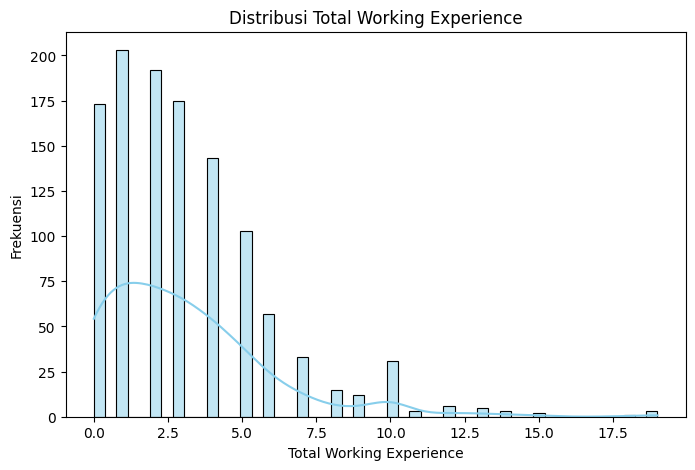

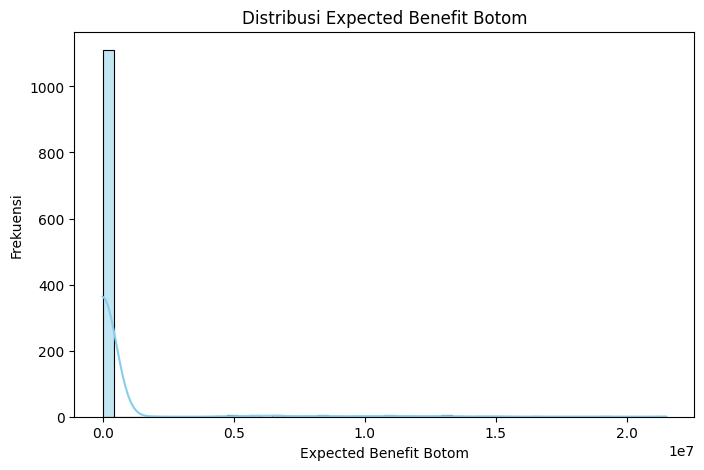

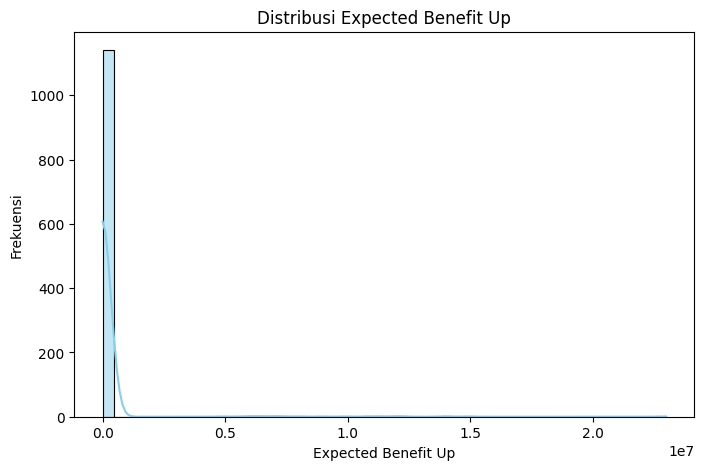

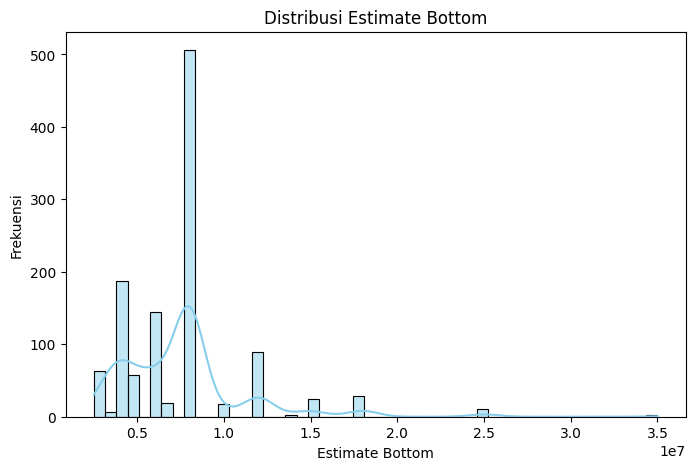

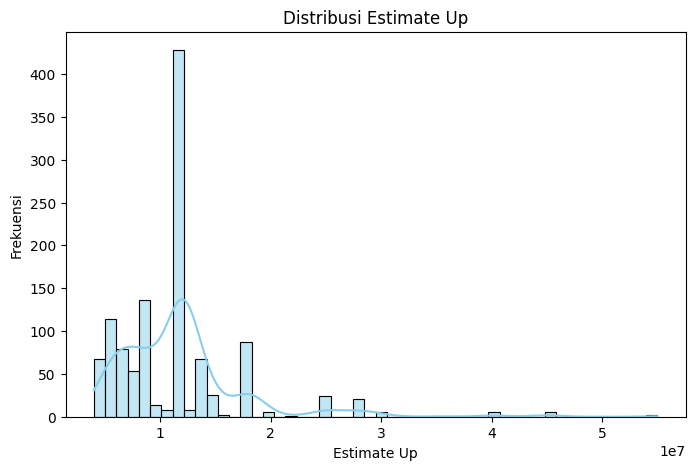

In [19]:
# Menunjukkan statistika deskriptif pada kolom numerik
print("Statistika Deskriptif pada Kolom Numerik:\n")
display(df[num_cols].describe().T)

print("\n")
# Menunjukkan distribusi data pada setiap fitur numerik
for col in num_cols:
    plt.figure(figsize=(8,5))
    sns.histplot(df[col], kde=True, bins=50, color='skyblue')
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.show()


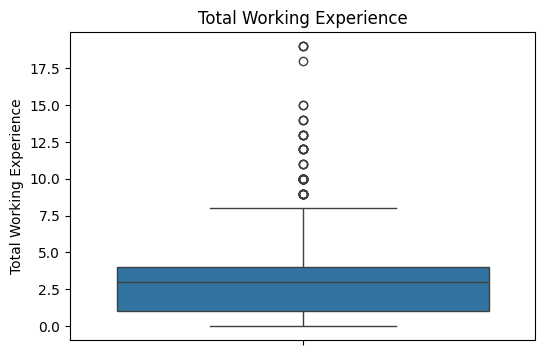

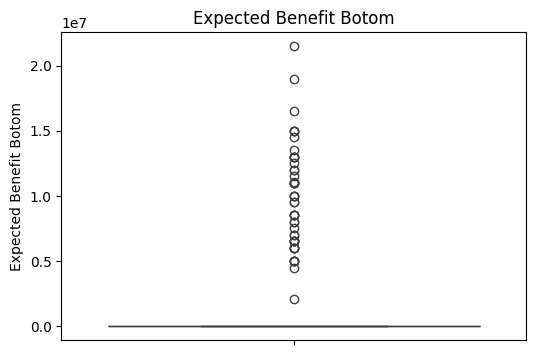

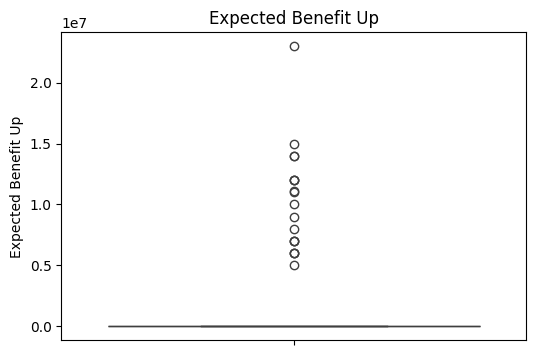

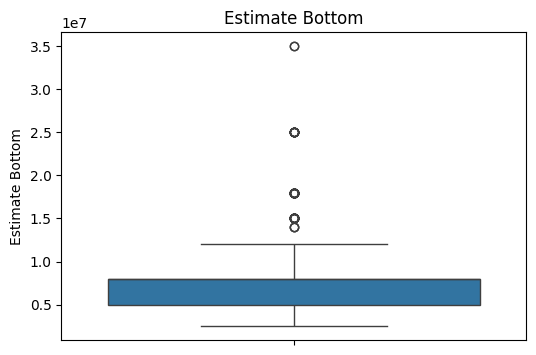

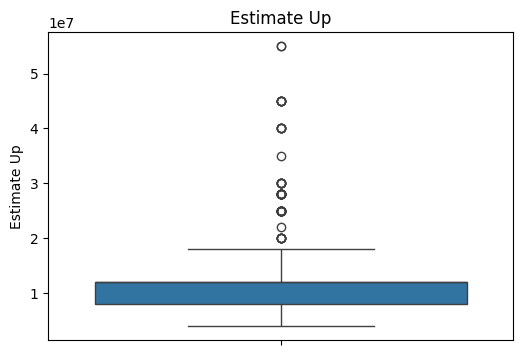

In [20]:
# Menunjukkan sebaran data dengan boxplot pada semua fitur numerik
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=df[col])  # pakai y biar lebih rapi
    plt.title(f"{col}")
    plt.show()

In [21]:
df['Expected Benefit Up'].value_counts()

,count
Expected Benefit Up,
0,1141
6000000,3
12000000,3
7000000,3
14000000,2
23000000,1
8000000,1
9000000,1
10000000,1


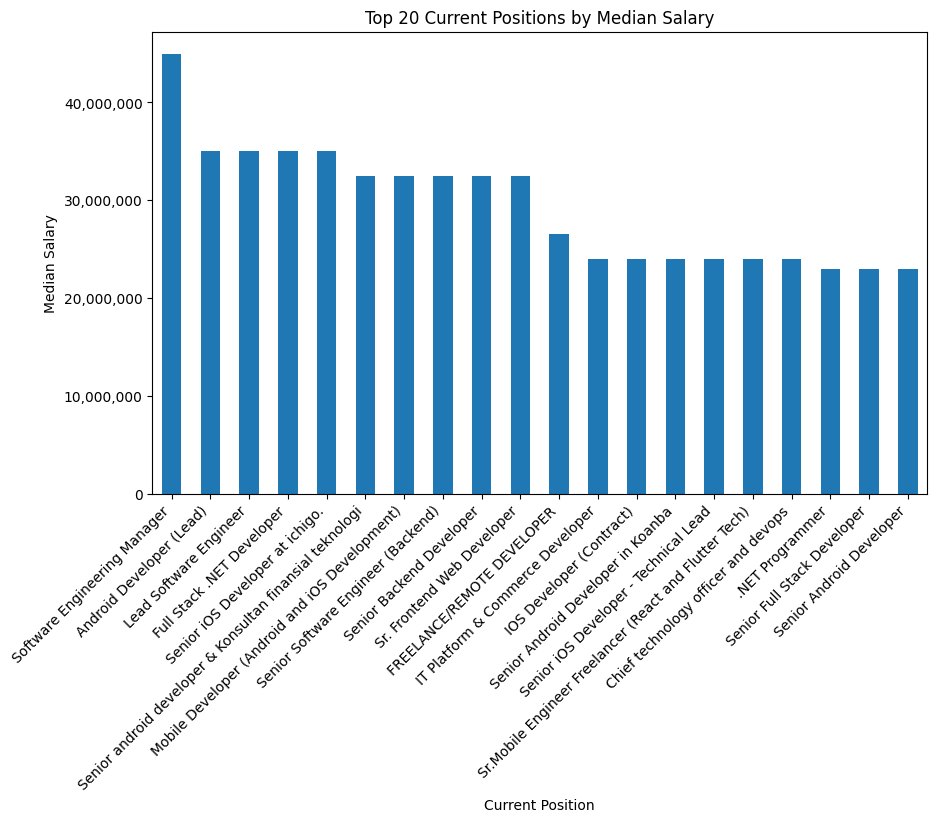

In [22]:
# Buat kolom gaji rata-rata
df['Estimate_Mean'] = (df['Estimate Bottom'] + df['Estimate Up']) / 2

# ================================
# 1. Current Position → top 20 posisi paling sering muncul, median gajinya
# ================================
top_current = (
    df.groupby("Current Position")['Estimate_Mean']
    .median()
    .sort_values(ascending=False)
    .head(20)
)

plt.figure(figsize=(10,6))
top_current.plot(kind='bar')
plt.title("Top 20 Current Positions by Median Salary")
plt.ylabel("Median Salary")
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.xticks(rotation=45, ha='right')
plt.show()

Aligned
False    97.586207
True      2.413793
Name: proportion, dtype: float64
Candidate Level
Entry-Level    4.027778e+06
Fresher        4.000000e+06
Junior         6.116550e+06
Mid-Level      1.087883e+07
Senior         2.457500e+07
Name: Estimate_Mean, dtype: float64


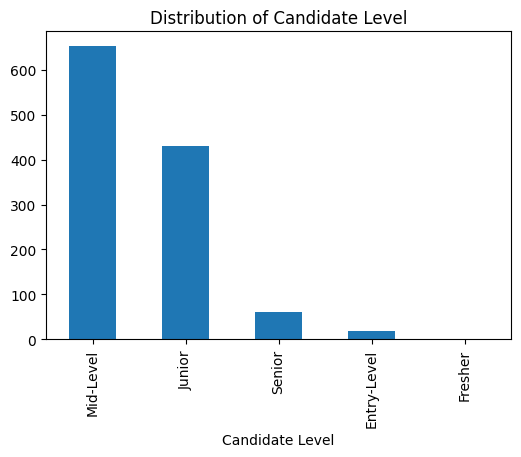

In [23]:
# 2. Target Position → apakah selaras dengan current position
# ================================
df['Aligned'] = df['Current Position'] == df['Targeted Position']
print(df['Aligned'].value_counts(normalize=True) * 100)  # % yang align

# ================================
# 3. Candidate Level → distribusi & rata-rata gaji
# ================================
level_stats = df.groupby("Candidate Level")['Estimate_Mean'].mean()
print(level_stats)

plt.figure(figsize=(6,4))
df['Candidate Level'].value_counts().plot(kind='bar')
plt.title("Distribution of Candidate Level")
plt.show()

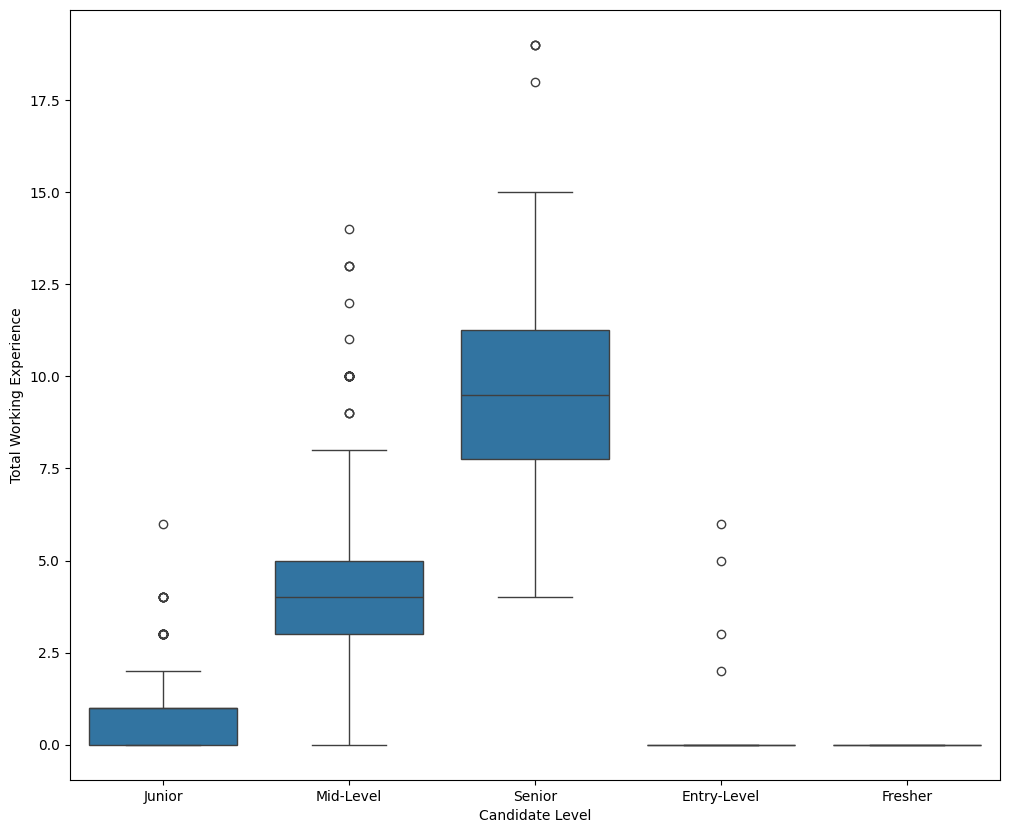

In [24]:
plt.figure(figsize=(12,10))
sns.boxplot(x='Candidate Level', y='Total Working Experience', data=df)
plt.show()

## DATA PREPROCESSING

In [25]:
df_prepro = df.copy()

In [26]:
df_prepro = df.drop(columns=['ID','Targeted Position', 'Education 3', 'Notice Period', 'Estimate_Range'])

In [27]:
df_prepro.head()


,Current Position,Total Working Experience,Candidate Level,Domisili,Education 1,Education 2,Expected Benefit Botom,Expected Benefit Up,Tech Stack,Certification,Estimate Bottom,Estimate Up,Estimate_Mean,Aligned
0,Web Developer,2,Junior,Bandung,UNIVERSITAS TERBUKA (2023-2027)\nBachelor of S...,SMK Negeri 2 Tasikmalaya (2019 - 2023)\nSistem...,0,0,"HTML ,CSS ,Javascript(ReactJs) ,Jquery ,Ajax ,...","[""Junior Web Developer, Digitalent Scholarship...",6000000.0,9000000.0,7500000.0,False
1,Full Stack Developer,1,Mid-Level,Bandung,Padjadjaran University 2017-2021,NaN,0,0,"Laravel, Phalcon, Python, Django, Next.Js, Tai...","[""Google Data Analytics, Coursera Jul 2023"",""L...",8000000.0,12000000.0,10000000.0,False
2,Junior Web Developer,0,Junior,"Semarang, Jawa Tengah",Universitas Negeri Semarang (2019 - 2024)\nS1 ...,Purwadhika Digital Technology School (2024)\nF...,0,0,"JavaScript, Prisma ORM, TypeScript, MySQL, Rea...","[""Full-stack Web Developer""]",4000000.0,6000000.0,5000000.0,False
3,Java Developer,0,Junior,Bandung,"Bachelor's degree, Universitas Pendidikan Indo...",NaN,0,0,"React, JavaScript, Mobile Application Software...",[],6000000.0,9000000.0,7500000.0,False
4,NaN,4,Mid-Level,Bandung,"Ilmu Komputer, Universitas Pendidikan Indonesi...",NaN,0,0,"PHP, Python, Java, Javascript, Go, C#, Laravel...",[],8000000.0,12000000.0,10000000.0,False


In [28]:
nums_cols = df_prepro.select_dtypes(include=[np.number]).columns
cat_cols = df_prepro.select_dtypes(include=['object', ]).columns

print("Kolom numerik:", nums_cols)
print("Kolom kategori:", cat_cols)

Kolom numerik: Index(['Total Working Experience', 'Expected Benefit Botom',
       'Expected Benefit Up', 'Estimate Bottom', 'Estimate Up',
       'Estimate_Mean'],
      dtype='object')
Kolom kategori: Index(['Current Position', 'Candidate Level', 'Domisili', 'Education 1',
       'Education 2', 'Tech Stack', 'Certification'],
      dtype='object')


In [29]:
#agar enak kita untuk mengatasi kategori ubah isi kolom kategori jadi huruf kecil
df_prepro[cat_cols] = df_prepro[cat_cols].apply(lambda x: x.str.lower())

In [30]:
df_prepro.head()

,Current Position,Total Working Experience,Candidate Level,Domisili,Education 1,Education 2,Expected Benefit Botom,Expected Benefit Up,Tech Stack,Certification,Estimate Bottom,Estimate Up,Estimate_Mean,Aligned
0,web developer,2,junior,bandung,universitas terbuka (2023-2027)\nbachelor of s...,smk negeri 2 tasikmalaya (2019 - 2023)\nsistem...,0,0,"html ,css ,javascript(reactjs) ,jquery ,ajax ,...","[""junior web developer, digitalent scholarship...",6000000.0,9000000.0,7500000.0,False
1,full stack developer,1,mid-level,bandung,padjadjaran university 2017-2021,NaN,0,0,"laravel, phalcon, python, django, next.js, tai...","[""google data analytics, coursera jul 2023"",""l...",8000000.0,12000000.0,10000000.0,False
2,junior web developer,0,junior,"semarang, jawa tengah",universitas negeri semarang (2019 - 2024)\ns1 ...,purwadhika digital technology school (2024)\nf...,0,0,"javascript, prisma orm, typescript, mysql, rea...","[""full-stack web developer""]",4000000.0,6000000.0,5000000.0,False
3,java developer,0,junior,bandung,"bachelor's degree, universitas pendidikan indo...",NaN,0,0,"react, javascript, mobile application software...",[],6000000.0,9000000.0,7500000.0,False
4,NaN,4,mid-level,bandung,"ilmu komputer, universitas pendidikan indonesi...",NaN,0,0,"php, python, java, javascript, go, c#, laravel...",[],8000000.0,12000000.0,10000000.0,False


In [31]:
df_prepro.columns = df_prepro.columns.str.lower()

In [32]:
df_prepro.head()

,current position,total working experience,candidate level,domisili,education 1,education 2,expected benefit botom,expected benefit up,tech stack,certification,estimate bottom,estimate up,estimate_mean,aligned
0,web developer,2,junior,bandung,universitas terbuka (2023-2027)\nbachelor of s...,smk negeri 2 tasikmalaya (2019 - 2023)\nsistem...,0,0,"html ,css ,javascript(reactjs) ,jquery ,ajax ,...","[""junior web developer, digitalent scholarship...",6000000.0,9000000.0,7500000.0,False
1,full stack developer,1,mid-level,bandung,padjadjaran university 2017-2021,NaN,0,0,"laravel, phalcon, python, django, next.js, tai...","[""google data analytics, coursera jul 2023"",""l...",8000000.0,12000000.0,10000000.0,False
2,junior web developer,0,junior,"semarang, jawa tengah",universitas negeri semarang (2019 - 2024)\ns1 ...,purwadhika digital technology school (2024)\nf...,0,0,"javascript, prisma orm, typescript, mysql, rea...","[""full-stack web developer""]",4000000.0,6000000.0,5000000.0,False
3,java developer,0,junior,bandung,"bachelor's degree, universitas pendidikan indo...",NaN,0,0,"react, javascript, mobile application software...",[],6000000.0,9000000.0,7500000.0,False
4,NaN,4,mid-level,bandung,"ilmu komputer, universitas pendidikan indonesi...",NaN,0,0,"php, python, java, javascript, go, c#, laravel...",[],8000000.0,12000000.0,10000000.0,False


In [33]:
df_prepro['current position'].value_counts()

,count
current position,
backend developer,47
full stack developer,46
software engineer,42
fullstack developer,39
web developer,29
...,...
frontend react native developer,1
android developer || frontend developer,1
mobile flutter developer at telkom indonesia,1


In [34]:
#handling missing value pada current position
from sklearn.impute import SimpleImputer
current_impute = SimpleImputer(strategy='constant', fill_value='unknown')
current_impute = current_impute.fit(df_prepro[['current position']])
df_prepro['current position'] = current_impute.transform(df_prepro[['current position']]).ravel()


In [35]:
df_prepro['current position'].unique()

array(['web developer', 'full stack developer', 'junior web developer',
       'java developer', 'unknown', 'technical writer',
       'full-stack software engineer/mobile app engineer',
       'software quality assurance manual tester',
       'ios developer (full-time)', 'mahasiswa calon wisudawan',
       'web developer & backend specialist', 'quality assurance',
       'freelance full stack developer', 'it manager', 'backend engineer',
       'software quality assurance', 'back end developer',
       'android developer', 'seo engineer and it support',
       'mobile engineer', 'project manager & production lead',
       'mobile engineer (flutter)', 'senior php developer',
       'backend developer • mobile developer', 'ios developer',
       'freelance web engineer', 'front-end web engineer',
       'software engineer', 'full-stack developer',
       'frontend developer / it ibi kesatuan (freelance)',
       'junior software developer', 'mahasiswa', 'system analyst staff',
       '

In [36]:
import re

def categorize_position(position):

    pos = str(position).lower().strip()

    #kategori Non-Teknis atau Entry-Level
    if "unknown" in pos:
        return "Unknown"
    if re.search(r'mahasiswa|student|intern|magang', pos):
        return "Student / Intern"

    #Kategori Developer Spesifik (didahulukan sebelum 'developer' umum)
    if re.search(r'backend|back end|back-end', pos):
        return "Backend Developer"
    if re.search(r'frontend|front end|front-end', pos):
        return "Frontend Developer"
    if re.search(r'fullstack|full stack|full-stack', pos):
        return "Fullstack Developer"
    if re.search(r'android|ios|mobile', pos):
        return "Mobile Developer"

    #Kategori Web Developer (sebagai catch-all untuk web tapi bukan front/back/fullstack)
    if re.search(r'\bweb\b', pos) and re.search(r'\bdeveloper\b', pos):
        return "Web Developer"

    #Kategori Teknis Lainnya
    if re.search(r'qa|quality assurance|tester', pos):
        return "Quality Assurance"
    if re.search(r'devops|network engineer|it support|infra', pos):
        return "IT Infrastructure"
    if re.search(r'analyst', pos):
        # Memeriksa apakah ini 'data analyst' atau 'system analyst'
        if 'data' in pos:
            return 'Data Analyst'
        if 'system' in pos:
            return 'System Analyst'
        return "Analyst" # Jika hanya 'analyst'

    #Kategori Software Engineer Umum (sebagai catch-all developer/engineer lainnya)
    if re.search(r'software engineer|software developer|programmer|application developer', pos):
        return "Software Engineer"

    if re.search(r'writer', pos):
        return "Technical Writer"

    #Kategori Lain-lain jika tidak ada yang cocok
    return "Other"


df_prepro['position_grup'] = df_prepro['current position'].apply(categorize_position)

In [37]:
print(df_prepro['position_grup'].value_counts())

position_grup
Other                  185
Fullstack Developer    160
Unknown                141
Software Engineer      114
Mobile Developer       111
Backend Developer      106
Frontend Developer      99
Quality Assurance       74
Student / Intern        60
Web Developer           51
Technical Writer        21
System Analyst          15
IT Infrastructure       13
Data Analyst             5
Analyst                  5
Name: count, dtype: int64


In [38]:
df_prepro = df_prepro.drop(columns=['current position'])

In [39]:
df_prepro.head()

,total working experience,candidate level,domisili,education 1,education 2,expected benefit botom,expected benefit up,tech stack,certification,estimate bottom,estimate up,estimate_mean,aligned,position_grup
0,2,junior,bandung,universitas terbuka (2023-2027)\nbachelor of s...,smk negeri 2 tasikmalaya (2019 - 2023)\nsistem...,0,0,"html ,css ,javascript(reactjs) ,jquery ,ajax ,...","[""junior web developer, digitalent scholarship...",6000000.0,9000000.0,7500000.0,False,Web Developer
1,1,mid-level,bandung,padjadjaran university 2017-2021,NaN,0,0,"laravel, phalcon, python, django, next.js, tai...","[""google data analytics, coursera jul 2023"",""l...",8000000.0,12000000.0,10000000.0,False,Fullstack Developer
2,0,junior,"semarang, jawa tengah",universitas negeri semarang (2019 - 2024)\ns1 ...,purwadhika digital technology school (2024)\nf...,0,0,"javascript, prisma orm, typescript, mysql, rea...","[""full-stack web developer""]",4000000.0,6000000.0,5000000.0,False,Web Developer
3,0,junior,bandung,"bachelor's degree, universitas pendidikan indo...",NaN,0,0,"react, javascript, mobile application software...",[],6000000.0,9000000.0,7500000.0,False,Other
4,4,mid-level,bandung,"ilmu komputer, universitas pendidikan indonesi...",NaN,0,0,"php, python, java, javascript, go, c#, laravel...",[],8000000.0,12000000.0,10000000.0,False,Unknown


In [40]:
df_prepro['candidate level'].value_counts()

,count
candidate level,
mid-level,652
junior,429
senior,60
entry-level,18
fresher,1


In [41]:
df_prepro.head()

,total working experience,candidate level,domisili,education 1,education 2,expected benefit botom,expected benefit up,tech stack,certification,estimate bottom,estimate up,estimate_mean,aligned,position_grup
0,2,junior,bandung,universitas terbuka (2023-2027)\nbachelor of s...,smk negeri 2 tasikmalaya (2019 - 2023)\nsistem...,0,0,"html ,css ,javascript(reactjs) ,jquery ,ajax ,...","[""junior web developer, digitalent scholarship...",6000000.0,9000000.0,7500000.0,False,Web Developer
1,1,mid-level,bandung,padjadjaran university 2017-2021,NaN,0,0,"laravel, phalcon, python, django, next.js, tai...","[""google data analytics, coursera jul 2023"",""l...",8000000.0,12000000.0,10000000.0,False,Fullstack Developer
2,0,junior,"semarang, jawa tengah",universitas negeri semarang (2019 - 2024)\ns1 ...,purwadhika digital technology school (2024)\nf...,0,0,"javascript, prisma orm, typescript, mysql, rea...","[""full-stack web developer""]",4000000.0,6000000.0,5000000.0,False,Web Developer
3,0,junior,bandung,"bachelor's degree, universitas pendidikan indo...",NaN,0,0,"react, javascript, mobile application software...",[],6000000.0,9000000.0,7500000.0,False,Other
4,4,mid-level,bandung,"ilmu komputer, universitas pendidikan indonesi...",NaN,0,0,"php, python, java, javascript, go, c#, laravel...",[],8000000.0,12000000.0,10000000.0,False,Unknown


In [42]:
#mapping candidate level
mapping_cand_level = {
    'fresher': 1,
    'entry-level': 2,
    'junior': 3,
    'mid-level': 4,
    'senior': 5
}

df_prepro['candidate level_mapping'] = df_prepro['candidate level'].map(mapping_cand_level)

In [43]:
df_prepro.head()

,total working experience,candidate level,domisili,education 1,education 2,expected benefit botom,expected benefit up,tech stack,certification,estimate bottom,estimate up,estimate_mean,aligned,position_grup,candidate level_mapping
0,2,junior,bandung,universitas terbuka (2023-2027)\nbachelor of s...,smk negeri 2 tasikmalaya (2019 - 2023)\nsistem...,0,0,"html ,css ,javascript(reactjs) ,jquery ,ajax ,...","[""junior web developer, digitalent scholarship...",6000000.0,9000000.0,7500000.0,False,Web Developer,3
1,1,mid-level,bandung,padjadjaran university 2017-2021,NaN,0,0,"laravel, phalcon, python, django, next.js, tai...","[""google data analytics, coursera jul 2023"",""l...",8000000.0,12000000.0,10000000.0,False,Fullstack Developer,4
2,0,junior,"semarang, jawa tengah",universitas negeri semarang (2019 - 2024)\ns1 ...,purwadhika digital technology school (2024)\nf...,0,0,"javascript, prisma orm, typescript, mysql, rea...","[""full-stack web developer""]",4000000.0,6000000.0,5000000.0,False,Web Developer,3
3,0,junior,bandung,"bachelor's degree, universitas pendidikan indo...",NaN,0,0,"react, javascript, mobile application software...",[],6000000.0,9000000.0,7500000.0,False,Other,3
4,4,mid-level,bandung,"ilmu komputer, universitas pendidikan indonesi...",NaN,0,0,"php, python, java, javascript, go, c#, laravel...",[],8000000.0,12000000.0,10000000.0,False,Unknown,4


In [44]:
df_prepro = df_prepro.drop(columns=['candidate level'])

In [45]:
df_prepro.head()

,total working experience,domisili,education 1,education 2,expected benefit botom,expected benefit up,tech stack,certification,estimate bottom,estimate up,estimate_mean,aligned,position_grup,candidate level_mapping
0,2,bandung,universitas terbuka (2023-2027)\nbachelor of s...,smk negeri 2 tasikmalaya (2019 - 2023)\nsistem...,0,0,"html ,css ,javascript(reactjs) ,jquery ,ajax ,...","[""junior web developer, digitalent scholarship...",6000000.0,9000000.0,7500000.0,False,Web Developer,3
1,1,bandung,padjadjaran university 2017-2021,NaN,0,0,"laravel, phalcon, python, django, next.js, tai...","[""google data analytics, coursera jul 2023"",""l...",8000000.0,12000000.0,10000000.0,False,Fullstack Developer,4
2,0,"semarang, jawa tengah",universitas negeri semarang (2019 - 2024)\ns1 ...,purwadhika digital technology school (2024)\nf...,0,0,"javascript, prisma orm, typescript, mysql, rea...","[""full-stack web developer""]",4000000.0,6000000.0,5000000.0,False,Web Developer,3
3,0,bandung,"bachelor's degree, universitas pendidikan indo...",NaN,0,0,"react, javascript, mobile application software...",[],6000000.0,9000000.0,7500000.0,False,Other,3
4,4,bandung,"ilmu komputer, universitas pendidikan indonesi...",NaN,0,0,"php, python, java, javascript, go, c#, laravel...",[],8000000.0,12000000.0,10000000.0,False,Unknown,4


In [46]:
#handling missing value domisili
df_prepro['domisili'].value_counts()

,count
domisili,
bandung,99
"jakarta, indonesia",77
jakarta,56
"bandung, indonesia",35
"bandung, jawa barat",19
...,...
"jakarta selatan, indonesia",1
"cikarang selatan, kab bekasi",1
"banyutowo, kec. dukuhseti, kab. pati",1


In [47]:
df_prepro['domisili'].unique()

array(['bandung', 'semarang, jawa tengah', 'mataram',
       'palembang, indonesia', 'jakarta, indonesia', nan,
       'bandung, west java, indonesia', 'bogor, west java', 'yogyakarta',
       'semarang', 'kabupaten bandung', 'denpasar, bali - indonesia',
       'jakarta', 'central jakarta, dki jakarta',
       'samarinda, east kalimantan', 'jakarta barat',
       'kendal, jawa tengah', 'west jakarta, indonesia',
       'kota jakarta selatan', 'semarang, central java',
       'east jakarta, indonesia', 'tangerang', 'bandung, indonesia',
       'bengkulu, indonesia', 'kota bandung', 'bandung, jawa barat',
       'dki jakarta, indonesia', 'demak', 'depok, west java',
       'jawa barat, indonesia', 'jakarta utara, dki jakarta',
       'tangerang, indonesia', 'bandung, west java',
       'landak, west kalimantan', 'kab. bekasi, jawa barat',
       'jakarta barat, indonesia', 'kab. bekasi',
       'katapang, kab. bandung, jawa barat', 'riau', 'makassar',
       'kabupaten bekasi, jawa bara

In [48]:
domisili_impute = SimpleImputer(strategy='constant', fill_value='unknown')
domisili_impute = domisili_impute.fit(df_prepro[['domisili']])
df_prepro['domisili'] = domisili_impute.transform(df_prepro[['domisili']]).ravel()

In [49]:
def standard_domisili(location):
    loc = str(location).lower().strip()

    #hapus tanda baca dan kata-kata umum yang tidak perlu
    loc = re.sub(r'[,.-]', ' ', loc) # ganti tanda baca dengan spasi
    loc = re.sub(r'\b(indonesia|id|city|kota|kabupaten|kab|regency|provinsi|province)\b', '', loc)

    #Hapus spasi berlebih yang mungkin muncul setelah penghapusan
    loc = re.sub(r'\s+', ' ', loc).strip()

    mapping = {
        'Jakarta': ['jakarta', 'dki', 'jkt'],
        'Bogor': ['bogor'],
        'Depok': ['depok'],
        'Tangerang': ['tangerang'],
        'Bekasi': ['bekasi', 'cikarang'],
        'Bandung': ['bandung', 'cimahi', 'soreang', 'lembang', 'padalarang', 'cileunyi', 'jatinangor'],
        'Surabaya': ['surabaya'],
        'Semarang': ['semarang'],
        'Yogyakarta': ['yogyakarta', 'sleman', 'bantul', 'kulon progo', 'gunung kidul'],
        'Malang': ['malang', 'batu'],
        'Surakarta': ['surakarta', 'solo', 'sukoharjo'],
        'Medan': ['medan'],
        'Makassar': ['makassar'],
        'Palembang': ['palembang'],
        'Denpasar': ['denpasar', 'bali', 'badung']
    }

    # Cari kata kunci dari mapping di dalam string lokasi
    for standardized_name, keywords in mapping.items():
        for keyword in keywords:
            if keyword in loc:
                return standardized_name # Jika ketemu, langsung kembalikan nama standarnya

    #menangkap kota-kota lain seperti 'klaten', 'tegal', dll.
    if loc:
        # Mengambil kata pertama dan mengubahnya menjadi Title Case
        fallback_name = loc.split()[0].title()
        return fallback_name

    # Jika setelah semua proses hasilnya string kosong
    return "Unknown"

df_prepro['domisili_cleaned'] = df_prepro['domisili'].apply(standard_domisili)

In [50]:
df_prepro['domisili_cleaned'].value_counts()

,count
domisili_cleaned,
Bandung,285
Jakarta,226
Unknown,108
Tangerang,49
Bogor,45
...,...
Blok,1
Kolaka,1
Sinjai,1


In [51]:
df_prepro['domisili_cleaned'].unique()


array(['Bandung', 'Semarang', 'Mataram', 'Jakarta', 'Unknown', 'Bogor',
       'Yogyakarta', 'Denpasar', 'Samarinda', 'Kendal', 'Tangerang',
       'Bengkulu', 'Demak', 'Depok', 'Jawa', 'Landak', 'Bekasi', 'Riau',
       'Makassar', 'Tegal', 'Pancoran', 'Medan', 'Malang', 'Pasuruan',
       'Klaten', 'Parepare', 'Bandar', 'Kediri', 'Sidoarjo', 'Palu',
       'Surabaya', 'Blitar', 'Palangka', 'Padang', 'Banda', 'Cirebon',
       'Tasikmalaya', 'Cianjur', 'Sukabumi', 'Praya', 'Porsea', 'Batam',
       'E', 'Karanganyar', 'Indramayu', 'Kalapanunggal', 'Sragen',
       'Karawang', 'Jalan', 'Tulungagung', 'Pati', 'Bondowoso',
       'Purwokerto', 'Wonosobo', 'Garut', 'Subang', 'Bojonegoro',
       'Kebumen', 'Jember', 'Limag', 'Tanggerang', 'Surakarta', 'Gresik',
       'Ngamprah', 'Kudus', 'Lawang', 'Cilegon', 'Probolinggo',
       'Banyutowo', 'Pangandaran', 'East', 'South', 'Kroya', 'Jambi',
       'Mojokerto', 'Magelang', 'Perumahan', 'Muara', 'West', 'Salatiga',
       'Kuningan', 'Pek

In [52]:
batas = 10

frekuensi = df_prepro['domisili_cleaned'].value_counts()
kategori_jarang = frekuensi[frekuensi < batas].index.tolist()

df_prepro.loc[df_prepro['domisili_cleaned'].isin(kategori_jarang), 'domisili_cleaned'] = 'Other'

In [53]:
df_prepro['domisili_cleaned'].value_counts()

,count
domisili_cleaned,
Bandung,285
Jakarta,226
Other,220
Unknown,108
Tangerang,49
Bogor,45
Bekasi,42
Yogyakarta,32
Semarang,26


In [54]:
#handling missing value education 1
df_prepro['education 1'].value_counts()

,count
education 1,
"smk merdeka bandung, teknik komputer dan jaringan, 2018 - 2020",2
"indonesian computer university, computer engineering, 2015 - 2019",2
"master of computer, maranatha christian university, kota bandung, jul 2024",2
coding bootcamp - front-end\ndevelopment class\njan 2019 - mar 2019\nbinar academy,2
"universitas amikom yogyakarta, d3-teknik informatika, 2021 - 2024",2
...,...
"s1 teknik informatika, uin sunan gunung djati bandung, 2012 - 2016",1
"university al-azhar indonesia - jakarta, indonesia sep 2023 - jan 2025 (expected) bachelor of informatics, 3.64/4.00",1
"politeknik pos indonesia, kom informatics management, 2017",1


In [55]:
df_prepro['education 1'].unique()


array(['universitas terbuka (2023-2027)\nbachelor of sistem informasi',
       'padjadjaran university 2017-2021',
       'universitas negeri semarang (2019 - 2024)\ns1 teknik elektro - ipk 3,59',
       ...,
       'politeknik negeri media kreatif - diploma 4 multimedia engineering technology (2024)',
       'global institute of technology and business - bachelor informatics engineering 2018 - 2022',
       'smks wahidin kota cirebon - kota cirebon, jawa barat, indonesia jun 2017 - jun 2020 sekolah menengah kejuruan in'],
      dtype=object)

In [56]:
def standardize_major(education_text):

    #Handle nilai kosong dan lakukan pembersihan awal
    if pd.isna(education_text):
        return "Unknown"

    text = str(education_text).lower()

    major_map = {
        'Software Engineering': r'rekayasa perangkat lunak|software engineering',
        'Information System': r'sistem informasi|information system|manajemen informatika',
        'Computer Engineering/Networking': r'teknik komputer|computer engineering|jaringan',
        'Web Development': r'full stack|front-end|javascript|web', # Umumnya dari bootcamp
        'Computer Science/Informatics': r'informatika|informatics|computer science|ilmu komputer',
        'Electrical/Telecommunication': r'teknik elektro|electrical engineering|elektronika|telecommunication',
        'Multimedia/Broadcasting': r'multimedia|broadcasting|penyiaran',
        'Business/Management': r'bisnis digital|digital business|hotel administration|manajemen',
        # Kategori non-IT atau pendidikan umum
        'Bootcamp/Training': r'bootcamp|hacktiv8|impact byte|binar academy',
        'High School': r'smk|sma|sekolah menengah'
    }

    #Lakukan pencarian berdasarkan mapping
    for major, pattern in major_map.items():
        if re.search(pattern, text):
            return major # Kembalikan kategori standar jika pola ditemukan

    # Jika tidak ada yang cocok sama sekali
    return "Other"

df_prepro['major'] = df_prepro['education 1'].apply(standardize_major)

In [57]:
df_prepro['major'].value_counts()

,count
major,
Computer Science/Informatics,439
Other,347
Information System,129
High School,50
Web Development,48
Software Engineering,47
Computer Engineering/Networking,34
Electrical/Telecommunication,22
Unknown,18


In [58]:
df_prepro.head()

,total working experience,domisili,education 1,education 2,expected benefit botom,expected benefit up,tech stack,certification,estimate bottom,estimate up,estimate_mean,aligned,position_grup,candidate level_mapping,domisili_cleaned,major
0,2,bandung,universitas terbuka (2023-2027)\nbachelor of s...,smk negeri 2 tasikmalaya (2019 - 2023)\nsistem...,0,0,"html ,css ,javascript(reactjs) ,jquery ,ajax ,...","[""junior web developer, digitalent scholarship...",6000000.0,9000000.0,7500000.0,False,Web Developer,3,Bandung,Information System
1,1,bandung,padjadjaran university 2017-2021,NaN,0,0,"laravel, phalcon, python, django, next.js, tai...","[""google data analytics, coursera jul 2023"",""l...",8000000.0,12000000.0,10000000.0,False,Fullstack Developer,4,Bandung,Other
2,0,"semarang, jawa tengah",universitas negeri semarang (2019 - 2024)\ns1 ...,purwadhika digital technology school (2024)\nf...,0,0,"javascript, prisma orm, typescript, mysql, rea...","[""full-stack web developer""]",4000000.0,6000000.0,5000000.0,False,Web Developer,3,Semarang,Electrical/Telecommunication
3,0,bandung,"bachelor's degree, universitas pendidikan indo...",NaN,0,0,"react, javascript, mobile application software...",[],6000000.0,9000000.0,7500000.0,False,Other,3,Bandung,Other
4,4,bandung,"ilmu komputer, universitas pendidikan indonesi...",NaN,0,0,"php, python, java, javascript, go, c#, laravel...",[],8000000.0,12000000.0,10000000.0,False,Unknown,4,Bandung,Computer Science/Informatics


In [59]:
def extract_degree_level(education_text):

    if pd.isna(education_text):
        return "Unknown"

    text = str(education_text).lower()

    degree_map = {
        'S3/Doctor': r'\b(s3|phd|doktor)\b',
        'S2/Master': r'\b(s2|master|magister)\b',
        'S1/Bachelor': r'\b(s1|sarjana|bachelor|undergraduate|s\.kom|s\.\w+)\b',
        'D4/Applied Bachelor': r'\b(d4|sarjana terapan|diploma 4)\b',
        'D3/Diploma': r'\b(d3|diploma 3|a\.md|d-3|diploma iii|ahli madya)\b',
        'High School': r'\b(smk|sma|ma|stm|high school|vocational)\b',
        'Bootcamp/Course': r'\b(bootcamp|course|pelatihan|training)\b'
    }

    for degree, pattern in degree_map.items():
        if re.search(pattern, text):
            return degree

    if re.search(r'universitas|university|institute|institut|polytechnic|politeknik', text):
        return "S1/Bachelor"

    return "Unknown"

df_prepro['degree_level'] = df_prepro['education 1'].apply(extract_degree_level)

In [60]:
df_prepro['degree_level'].value_counts()

,count
degree_level,
S1/Bachelor,840
Unknown,145
High School,79
D3/Diploma,41
Bootcamp/Course,23
S2/Master,22
D4/Applied Bachelor,10


In [61]:
df_prepro = df_prepro.drop(['education 1', 'education 2'], axis=1)

In [62]:
df_prepro.head()

,total working experience,domisili,expected benefit botom,expected benefit up,tech stack,certification,estimate bottom,estimate up,estimate_mean,aligned,position_grup,candidate level_mapping,domisili_cleaned,major,degree_level
0,2,bandung,0,0,"html ,css ,javascript(reactjs) ,jquery ,ajax ,...","[""junior web developer, digitalent scholarship...",6000000.0,9000000.0,7500000.0,False,Web Developer,3,Bandung,Information System,S1/Bachelor
1,1,bandung,0,0,"laravel, phalcon, python, django, next.js, tai...","[""google data analytics, coursera jul 2023"",""l...",8000000.0,12000000.0,10000000.0,False,Fullstack Developer,4,Bandung,Other,S1/Bachelor
2,0,"semarang, jawa tengah",0,0,"javascript, prisma orm, typescript, mysql, rea...","[""full-stack web developer""]",4000000.0,6000000.0,5000000.0,False,Web Developer,3,Semarang,Electrical/Telecommunication,S1/Bachelor
3,0,bandung,0,0,"react, javascript, mobile application software...",[],6000000.0,9000000.0,7500000.0,False,Other,3,Bandung,Other,S1/Bachelor
4,4,bandung,0,0,"php, python, java, javascript, go, c#, laravel...",[],8000000.0,12000000.0,10000000.0,False,Unknown,4,Bandung,Computer Science/Informatics,S1/Bachelor


In [63]:
df_prepro.isnull().sum()

,0
total working experience,0
domisili,0
expected benefit botom,0
expected benefit up,0
tech stack,5
certification,359
estimate bottom,0
estimate up,0
estimate_mean,0
aligned,0


In [64]:
df_prepro['tech stack'].value_counts().head(50)

,count
tech stack,
"jetpack compose, kotlin, java, c #, php, codeigniter, sqlite, html + css, python, mysql, server sql, firebase",2
"apache kafka, rabbitmq, mongodb, flutter, express.js, go, typescript, javafx",2
"next js, typescript, react js, postgresql, mongodb, swagger, postman, wordpress, woocommerce, tailwind css, node.js",2
"pemrograman web, basis data, pengembangan web, php, html, css, javascript, laravel, bootstrap, jquery, java springboot, next.js, livewire",2
"html, php, css, javascript, laravel, bootstrap, tailwind css, vue.js, jquery, node.js, mysql, postgresql, git (gitlab dan github)",2
"python, fastapi, sql, linux",2
"visual basic for applications, visual basic, php, css, oracle",2
"php, sql, html, css, javascript, nodejs, git scm, graphic design",2
"golang, javascript, typescript, python, nodejs, reactjs, nextjs, rabbitmq, kafka, pub/sub, rest, grpc, graphql, postgrest, mysql, mongodb, kinetica, fastdb, github, gitlab, jenkins, gitlab ci, github actions, docker, kubernetes, ocp, data ingestion airflow, bigquery, elk, grafana, newrelic, sonarqube",2


In [65]:
df_prepro['tech stack'].unique()


array(['html ,css ,javascript(reactjs) ,jquery ,ajax ,frameworkcss(bootstrap,tailwind) ,apis ,seo ,programming language (php,node.js) ,threejs',
       'laravel, phalcon, python, django, next.js, tailwind css, rest api, jquery, ajax, react.js, vue.js, git, data analytics, mysql, mongodb',
       'javascript, prisma orm, typescript, mysql, react.js, tailwind css, next.js, git, express.js, github, html',
       ...,
       'css, html, javascript, typescript, php, go, laravel, yii2, vue, react, angular, sql server, mysql',
       'swiftui, uikit, core data, core animation, core graphics, core text, kotlin multi platform, restful api, rabbitmq, firebase, mqtt, php, mysql, opencv, qt creator',
       'laravel, next.js, codeigniter3, javascript, node.js, mysql'],
      dtype=object)

In [66]:
languages = ['python', 'java', 'c', 'c++', 'c#', 'kotlin', 'swift', 'javascript', 'typescript', 'go', 'php', 'dart', 'ruby', 'rust']
frameworks = ['react', 'react native', 'vue', 'angular', 'next.js', 'nest.js', 'laravel', 'django', 'flask', 'fastapi', 'springboot', 'bootstrap', 'tailwind', 'express.js', 'node.js', 'flutter', 'jetpack compose']
databases = ['mysql', 'postgresql', 'mongodb', 'oracle', 'redis', 'sqlite', 'mariadb', 'firebase', 'bigquery', 'elk', 'kinetica']
tools_devops = ['docker', 'kubernetes', 'jenkins', 'git', 'github', 'gitlab', 'jira', 'airflow', 'grafana', 'newrelic', 'elk']
cloud = ['aws', 'gcp', 'azure', 'alibaba cloud', 'supabase']
soft_skills = ['problem solving', 'leadership', 'teamwork', 'communication', 'public speaking']

def extract_skills(tech_string, category_list):
    if pd.isna(tech_string):
        return 'unknown'
    tech_string = tech_string.lower()
    extracted = [skill for skill in category_list if skill.lower() in tech_string]
    return extracted if extracted else 'unknown'

#kolom baru
df_prepro['Languages'] = df_prepro['tech stack'].apply(lambda x: extract_skills(x, languages))
df_prepro['Frameworks & Libraries'] = df_prepro['tech stack'].apply(lambda x: extract_skills(x, frameworks))
df_prepro['Databases'] = df_prepro['tech stack'].apply(lambda x: extract_skills(x, databases))
df_prepro['Tools & DevOps'] = df_prepro['tech stack'].apply(lambda x: extract_skills(x, tools_devops))
df_prepro['Cloud'] = df_prepro['tech stack'].apply(lambda x: extract_skills(x, cloud))
df_prepro['Soft Skills / Others'] = df_prepro['tech stack'].apply(lambda x: extract_skills(x, soft_skills))

In [67]:
df_prepro = df_prepro.drop(columns=['tech stack'])

In [68]:
df_prepro.head()

,total working experience,domisili,expected benefit botom,expected benefit up,certification,estimate bottom,estimate up,estimate_mean,aligned,position_grup,candidate level_mapping,domisili_cleaned,major,degree_level,Languages,Frameworks & Libraries,Databases,Tools & DevOps,Cloud,Soft Skills / Others
0,2,bandung,0,0,"[""junior web developer, digitalent scholarship...",6000000.0,9000000.0,7500000.0,False,Web Developer,3,Bandung,Information System,S1/Bachelor,"[java, c, javascript, php]","[react, bootstrap, tailwind, node.js]",unknown,unknown,unknown,unknown
1,1,bandung,0,0,"[""google data analytics, coursera jul 2023"",""l...",8000000.0,12000000.0,10000000.0,False,Fullstack Developer,4,Bandung,Other,S1/Bachelor,"[python, c, go]","[react, vue, next.js, laravel, django, tailwind]","[mysql, mongodb]",[git],unknown,unknown
2,0,"semarang, jawa tengah",0,0,"[""full-stack web developer""]",4000000.0,6000000.0,5000000.0,False,Web Developer,3,Semarang,Electrical/Telecommunication,S1/Bachelor,"[java, c, javascript, typescript]","[react, next.js, tailwind, express.js]",[mysql],"[git, github]",unknown,unknown
3,0,bandung,0,0,[],6000000.0,9000000.0,7500000.0,False,Other,3,Bandung,Other,S1/Bachelor,"[java, c, kotlin, javascript, php]","[react, laravel]",[mysql],[git],unknown,unknown
4,4,bandung,0,0,[],8000000.0,12000000.0,10000000.0,False,Unknown,4,Bandung,Computer Science/Informatics,S1/Bachelor,"[python, java, c, c#, kotlin, javascript, go, ...","[react, next.js, laravel, django, flask]","[mysql, postgresql, mongodb]",unknown,unknown,unknown


In [69]:
def replace_empty_list(x):
    if x == '[]':
      return np.nan
    else:
      return x

df_prepro['certification'] = df_prepro['certification'].apply(replace_empty_list)

In [70]:
df_prepro['certification'].value_counts(dropna=False)

,count
certification,
NaN,715
"[""junior to senior developer"",""javascript data structures and algorithms"",""complete web & mobile designer: ui/ux, figma""]",2
"[""belajar membuat front-end web untuk pemula""]",2
"[""codepolitan - html, css, bootstrap"",""alibaba cloud certifcation""]",2
"[""hackerrank sql (basic) certificate"",""belajar prinsip pemrograman solid - dicoding""]",2
...,...
"[""architecting on aws (membangun arsitektur\ncloud di aws), dicoding indonesia"",""belajar membuat aplikasi backend untuk\npemula, dicoding indonesia"",""belajar dasar pemrograman javascript, dicoding indonesia"",""cloud practitioner essentials (belajar dasar\naws cloud), dicoding indonesia"",""belajar dasar visualisasi data, dicoding indonesia"",""belajar machine learning untuk pemula, dicoding indonesia"",""memulai pemrograman dengan python, dicoding indonesia"",""instructor backend developer - laravel class, jabar digital academy group""]",1
"[""sertifikat pelatihan aktivis ngo"",""setifikat pelatihan software gis oleh esri tahun 2017""]",1
"[""top 10 capstone project | bangkit academy""]",1


In [71]:
cert_imputer = SimpleImputer(strategy='constant', fill_value='Unknown Cert')
cert_imputer = cert_imputer.fit(df_prepro[['certification']])
df_prepro['certification'] = cert_imputer.transform(df_prepro[['certification']]).ravel()


In [72]:
#handling certification
df_prepro['certification'].unique()

array(['["junior web developer, digitalent scholarship, no : 19362131140-91/vsga/blsdm\\nkominfo/2023"]',
       '["google data analytics, coursera jul 2023","learning machine learning for beginners, dicoding sept 2023","getting started with python programming, dicoding sept 2023","getting started with kotlin programming, dicoding jul 2023","learning to create back-end applications for beginners, dicoding may 2023","learning basic javascript programming, dicoding may 2023","learning basic data visualization, dicoding sept 2023"]',
       '["full-stack web developer"]', 'Unknown Cert',
       '["belajar fundamental aplikasi android - dicoding september 2023","mobile development - bangkit academy january 2024","android developer expert - dicoding march 2024"]',
       '["quality assurance sanbercode 04/2025 - 05/2025","microsoft office untuk pegawai perkantoran skill academy by ruangguru 04/2024 - 05/2024"]',
       '["bootcamp frontend engineering - binar academy (2022)","pelatihan meng

In [73]:
import pandas as pd
import ast

def parse_certification(value):

    if pd.isna(value):
        return []

    text = str(value)

    if text.strip().startswith('['):
        try:

            return ast.literal_eval(text)
        except (ValueError, SyntaxError):
            return [text]

    else:
        return [text]

df_prepro['certification_list'] = df_prepro['certification'].apply(parse_certification)

df_prepro['certification_count'] = df_prepro['certification_list'].apply(len)

In [74]:
skill_keywords = {
    'cert_web_dev': ['web', 'front-end', 'frontend', 'back-end', 'backend', 'fullstack', 'full-stack', 'javascript', 'react', 'laravel', 'node', 'html', 'css', 'php', 'vue', 'django', 'mern'],
    'cert_mobile_dev': ['mobile', 'android', 'ios', 'flutter', 'kotlin', 'swift', 'react native'],
    'cert_cloud': ['cloud', 'aws', 'azure', 'google cloud', 'gcp', 'alibaba', 'digitalocean'],
    'cert_data_science': ['data science', 'machine learning', 'data analyst', 'data analytics', 'big data', 'tensorflow', 'python for data', 'visualisasi data'],
    'cert_qa': ['qa', 'quality assurance', 'testing', 'tester', 'istqb', 'selenium', 'cypress', 'automation test'],
    'cert_ui_ux': ['ui/ux', 'ux design', 'ui design', 'figma', 'user experience'],
    'cert_devops': ['devops', 'docker', 'kubernetes'],
    'cert_networking': ['network', 'jaringan', 'cisco', 'ccna', 'mikrotik', 'mtcna'],
    'cert_security': ['security', 'cybersecurity', 'keamanan', 'hacking', 'comptia'],
    'cert_project_mgmt': ['project management', 'agile', 'scrum', 'pmp'],
    'cert_bnsp': ['bnsp', 'badan nasional sertifikasi profesi']
}

def has_skill_certification(cert_list, keywords):
    for cert in cert_list:
        cert_lower = str(cert).lower()
        for keyword in keywords:
            if keyword in cert_lower:
                return 1
    return 0


for col_name, keywords in skill_keywords.items():
    df_prepro[col_name] = df_prepro['certification_list'].apply(lambda cert_list: has_skill_certification(cert_list, keywords))

In [75]:
df_prepro = df_prepro.drop(['certification', 'certification_list'], axis=1)

In [76]:
df_prepro.head()

,total working experience,domisili,expected benefit botom,expected benefit up,estimate bottom,estimate up,estimate_mean,aligned,position_grup,candidate level_mapping,...,cert_mobile_dev,cert_cloud,cert_data_science,cert_qa,cert_ui_ux,cert_devops,cert_networking,cert_security,cert_project_mgmt,cert_bnsp
0,2,bandung,0,0,6000000.0,9000000.0,7500000.0,False,Web Developer,3,...,0,0,0,0,0,0,0,0,0,0
1,1,bandung,0,0,8000000.0,12000000.0,10000000.0,False,Fullstack Developer,4,...,1,0,1,0,0,0,0,0,0,0
2,0,"semarang, jawa tengah",0,0,4000000.0,6000000.0,5000000.0,False,Web Developer,3,...,0,0,0,0,0,0,0,0,0,0
3,0,bandung,0,0,6000000.0,9000000.0,7500000.0,False,Other,3,...,0,0,0,0,0,0,0,0,0,0
4,4,bandung,0,0,8000000.0,12000000.0,10000000.0,False,Unknown,4,...,0,0,0,0,0,0,0,0,0,0


In [77]:
df_prepro = df_prepro.drop(['estimate_mean', 'aligned'], axis = 1)

In [78]:
df_prepro.head()

,total working experience,domisili,expected benefit botom,expected benefit up,estimate bottom,estimate up,position_grup,candidate level_mapping,domisili_cleaned,major,...,cert_mobile_dev,cert_cloud,cert_data_science,cert_qa,cert_ui_ux,cert_devops,cert_networking,cert_security,cert_project_mgmt,cert_bnsp
0,2,bandung,0,0,6000000.0,9000000.0,Web Developer,3,Bandung,Information System,...,0,0,0,0,0,0,0,0,0,0
1,1,bandung,0,0,8000000.0,12000000.0,Fullstack Developer,4,Bandung,Other,...,1,0,1,0,0,0,0,0,0,0
2,0,"semarang, jawa tengah",0,0,4000000.0,6000000.0,Web Developer,3,Semarang,Electrical/Telecommunication,...,0,0,0,0,0,0,0,0,0,0
3,0,bandung,0,0,6000000.0,9000000.0,Other,3,Bandung,Other,...,0,0,0,0,0,0,0,0,0,0
4,4,bandung,0,0,8000000.0,12000000.0,Unknown,4,Bandung,Computer Science/Informatics,...,0,0,0,0,0,0,0,0,0,0


In [79]:
df_prepro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1160 entries, 0 to 1159
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   total working experience  1160 non-null   int64  
 1   domisili                  1160 non-null   object 
 2   expected benefit botom    1160 non-null   int64  
 3   expected benefit up       1160 non-null   int64  
 4   estimate bottom           1160 non-null   float64
 5   estimate up               1160 non-null   float64
 6   position_grup             1160 non-null   object 
 7   candidate level_mapping   1160 non-null   int64  
 8   domisili_cleaned          1160 non-null   object 
 9   major                     1160 non-null   object 
 10  degree_level              1160 non-null   object 
 11  Languages                 1160 non-null   object 
 12  Frameworks & Libraries    1160 non-null   object 
 13  Databases                 1160 non-null   object 
 14  Tools & 

In [80]:
df_prepro = df_prepro.drop('domisili', axis=1)

In [81]:
df_prepro['degree_level'].unique()

array(['S1/Bachelor', 'Unknown', 'S2/Master', 'D3/Diploma', 'High School',
       'Bootcamp/Course', 'D4/Applied Bachelor'], dtype=object)

In [82]:
map_degree_level ={
    'Unknown': 0,
    'High School': 1,
    'Bootcamp/Course': 2,
    'D4/Applied Bachelor': 3,
    'D3/Diploma': 4,
    'S1/Bachelor': 5,
    'S2/Master' : 6
}

df_prepro['map_degree_level'] = df_prepro['degree_level'].map(map_degree_level)

df_prepro = df_prepro.drop('degree_level', axis =1)


In [83]:
df_prepro.head()

,total working experience,expected benefit botom,expected benefit up,estimate bottom,estimate up,position_grup,candidate level_mapping,domisili_cleaned,major,Languages,...,cert_cloud,cert_data_science,cert_qa,cert_ui_ux,cert_devops,cert_networking,cert_security,cert_project_mgmt,cert_bnsp,map_degree_level
0,2,0,0,6000000.0,9000000.0,Web Developer,3,Bandung,Information System,"[java, c, javascript, php]",...,0,0,0,0,0,0,0,0,0,5
1,1,0,0,8000000.0,12000000.0,Fullstack Developer,4,Bandung,Other,"[python, c, go]",...,0,1,0,0,0,0,0,0,0,5
2,0,0,0,4000000.0,6000000.0,Web Developer,3,Semarang,Electrical/Telecommunication,"[java, c, javascript, typescript]",...,0,0,0,0,0,0,0,0,0,5
3,0,0,0,6000000.0,9000000.0,Other,3,Bandung,Other,"[java, c, kotlin, javascript, php]",...,0,0,0,0,0,0,0,0,0,5
4,4,0,0,8000000.0,12000000.0,Unknown,4,Bandung,Computer Science/Informatics,"[python, java, c, c#, kotlin, javascript, go, ...",...,0,0,0,0,0,0,0,0,0,5


In [84]:
df_prepro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1160 entries, 0 to 1159
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   total working experience  1160 non-null   int64  
 1   expected benefit botom    1160 non-null   int64  
 2   expected benefit up       1160 non-null   int64  
 3   estimate bottom           1160 non-null   float64
 4   estimate up               1160 non-null   float64
 5   position_grup             1160 non-null   object 
 6   candidate level_mapping   1160 non-null   int64  
 7   domisili_cleaned          1160 non-null   object 
 8   major                     1160 non-null   object 
 9   Languages                 1160 non-null   object 
 10  Frameworks & Libraries    1160 non-null   object 
 11  Databases                 1160 non-null   object 
 12  Tools & DevOps            1160 non-null   object 
 13  Cloud                     1160 non-null   object 
 14  Soft Ski

In [85]:
df_prepro[['Languages', 'Frameworks & Libraries','Databases', 'Tools & DevOps', 'Cloud', 'Soft Skills / Others']].head()

,Languages,Frameworks & Libraries,Databases,Tools & DevOps,Cloud,Soft Skills / Others
0,"[java, c, javascript, php]","[react, bootstrap, tailwind, node.js]",unknown,unknown,unknown,unknown
1,"[python, c, go]","[react, vue, next.js, laravel, django, tailwind]","[mysql, mongodb]",[git],unknown,unknown
2,"[java, c, javascript, typescript]","[react, next.js, tailwind, express.js]",[mysql],"[git, github]",unknown,unknown
3,"[java, c, kotlin, javascript, php]","[react, laravel]",[mysql],[git],unknown,unknown
4,"[python, java, c, c#, kotlin, javascript, go, ...","[react, next.js, laravel, django, flask]","[mysql, postgresql, mongodb]",unknown,unknown,unknown


In [86]:
top_languages = df_prepro['Languages'].explode().value_counts().head(10)
print("--- Top 10 Bahasa Pemrograman ---")
print(top_languages)

top_frameworks = df_prepro['Frameworks & Libraries'].explode().value_counts().head(10)
print("\n--- Top 10 Frameworks & Libraries ---")
print(top_frameworks)

--- Top 10 Bahasa Pemrograman ---
Languages
c             1115
java           740
javascript     584
php            501
go             442
python         262
typescript     214
kotlin         143
c++             87
c#              80
Name: count, dtype: int64

--- Top 10 Frameworks & Libraries ---
Frameworks & Libraries
react           455
laravel         422
unknown         373
tailwind        229
bootstrap       225
vue             210
flutter         163
node.js         135
react native    129
next.js          95
Name: count, dtype: int64


In [87]:
import pandas as pd

list_top_languages = top_languages.index.tolist()
list_top_frameworks = top_frameworks.index.tolist()

def create_binary_features_safe(df, source_column, top_skills_list):

    prefix = source_column.lower().split()[0]

    for skill in top_skills_list:
        new_col_name = f"{prefix}_{skill.replace(' ', '_')}"


        df[new_col_name] = df[source_column].apply(
            lambda skill_list: 1 if isinstance(skill_list, list) and skill in skill_list else 0
        )
    return df

print("\nMembuat fitur biner untuk Languages...")
df_prepro = create_binary_features_safe(df_prepro, 'Languages', list_top_languages)

print("Membuat fitur biner untuk Frameworks & Libraries...")
df_prepro = create_binary_features_safe(df_prepro, 'Frameworks & Libraries', list_top_frameworks)

df_prepro = df_prepro.drop(['Languages', 'Frameworks & Libraries'], axis=1)

print("\nProses selesai! Kolom baru telah ditambahkan.")
print(df_prepro.filter(like='lang_').head())
print(df_prepro.filter(like='frameworks_').head())


Membuat fitur biner untuk Languages...
Membuat fitur biner untuk Frameworks & Libraries...

Proses selesai! Kolom baru telah ditambahkan.
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]
   frameworks_react  frameworks_laravel  frameworks_unknown  \
0                 1                   0                   0   
1                 1                   1                   0   
2                 1                   0                   0   
3                 1                   1                   0   
4                 1                   1                   0   

   frameworks_tailwind  frameworks_bootstrap  frameworks_vue  \
0                    1                     1               0   
1                    1                     0               1   
2                    1                     0               0   
3                    0                     0               0   
4                    0                     0               0   

   frameworks_flutter  frameworks_node.js  fra

In [88]:
df_prepro.head()

,total working experience,expected benefit botom,expected benefit up,estimate bottom,estimate up,position_grup,candidate level_mapping,domisili_cleaned,major,Databases,...,frameworks_react,frameworks_laravel,frameworks_unknown,frameworks_tailwind,frameworks_bootstrap,frameworks_vue,frameworks_flutter,frameworks_node.js,frameworks_react_native,frameworks_next.js
0,2,0,0,6000000.0,9000000.0,Web Developer,3,Bandung,Information System,unknown,...,1,0,0,1,1,0,0,1,0,0
1,1,0,0,8000000.0,12000000.0,Fullstack Developer,4,Bandung,Other,"[mysql, mongodb]",...,1,1,0,1,0,1,0,0,0,1
2,0,0,0,4000000.0,6000000.0,Web Developer,3,Semarang,Electrical/Telecommunication,[mysql],...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,6000000.0,9000000.0,Other,3,Bandung,Other,[mysql],...,1,1,0,0,0,0,0,0,0,0
4,4,0,0,8000000.0,12000000.0,Unknown,4,Bandung,Computer Science/Informatics,"[mysql, postgresql, mongodb]",...,1,1,0,0,0,0,0,0,0,1


In [89]:
df_prepro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1160 entries, 0 to 1159
Data columns (total 46 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   total working experience  1160 non-null   int64  
 1   expected benefit botom    1160 non-null   int64  
 2   expected benefit up       1160 non-null   int64  
 3   estimate bottom           1160 non-null   float64
 4   estimate up               1160 non-null   float64
 5   position_grup             1160 non-null   object 
 6   candidate level_mapping   1160 non-null   int64  
 7   domisili_cleaned          1160 non-null   object 
 8   major                     1160 non-null   object 
 9   Databases                 1160 non-null   object 
 10  Tools & DevOps            1160 non-null   object 
 11  Cloud                     1160 non-null   object 
 12  Soft Skills / Others      1160 non-null   object 
 13  certification_count       1160 non-null   int64  
 14  cert_web

In [90]:
df_prepro[['Databases', 'Tools & DevOps', 'Cloud', 'Soft Skills / Others']].head(20)

,Databases,Tools & DevOps,Cloud,Soft Skills / Others
0,unknown,unknown,unknown,unknown
1,"[mysql, mongodb]",[git],unknown,unknown
2,[mysql],"[git, github]",unknown,unknown
3,[mysql],[git],unknown,unknown
4,"[mysql, postgresql, mongodb]",unknown,unknown,unknown
5,unknown,[jira],unknown,unknown
6,[firebase],"[git, github, jira]",unknown,unknown
7,"[mysql, sqlite, firebase]","[git, github]",unknown,unknown
8,unknown,unknown,unknown,unknown
9,unknown,unknown,unknown,unknown


In [91]:

columns_to_binarize = ['Databases', 'Tools & DevOps', 'Cloud']

for column in columns_to_binarize:
    print(f"Memproses kolom: {column}...")

    top_skills = df_prepro[column].explode().dropna().value_counts().head(10)
    list_top_skills = top_skills.index.tolist()

    if not list_top_skills:
        print(f"Tidak ada skill yang signifikan di kolom '{column}'. Melewati...")
        continue

    df_prepro = create_binary_features_safe(df_prepro, column, list_top_skills)


columns_to_drop = ['Databases', 'Tools & DevOps', 'Cloud', 'Soft Skills / Others']

print("\nMenghapus kolom asli dan kolom yang tidak informatif...")
df_prepro = df_prepro.drop(columns=columns_to_drop)

print("\nProses selesai!")
print(df_prepro.filter(regex='^(databases_|tools_|cloud_)').head())

Memproses kolom: Databases...
Memproses kolom: Tools & DevOps...
Memproses kolom: Cloud...

Menghapus kolom asli dan kolom yang tidak informatif...

Proses selesai!
   databases_unknown  databases_mysql  databases_postgresql  \
0                  0                0                     0   
1                  0                1                     0   
2                  0                1                     0   
3                  0                1                     0   
4                  0                1                     1   

   databases_mongodb  databases_firebase  databases_redis  databases_oracle  \
0                  0                   0                0                 0   
1                  1                   0                0                 0   
2                  0                   0                0                 0   
3                  0                   0                0                 0   
4                  1                   0                0    

In [92]:
df_prepro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1160 entries, 0 to 1159
Data columns (total 68 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   total working experience  1160 non-null   int64  
 1   expected benefit botom    1160 non-null   int64  
 2   expected benefit up       1160 non-null   int64  
 3   estimate bottom           1160 non-null   float64
 4   estimate up               1160 non-null   float64
 5   position_grup             1160 non-null   object 
 6   candidate level_mapping   1160 non-null   int64  
 7   domisili_cleaned          1160 non-null   object 
 8   major                     1160 non-null   object 
 9   certification_count       1160 non-null   int64  
 10  cert_web_dev              1160 non-null   int64  
 11  cert_mobile_dev           1160 non-null   int64  
 12  cert_cloud                1160 non-null   int64  
 13  cert_data_science         1160 non-null   int64  
 14  cert_qa 

In [93]:
df_prepro[['position_grup', 'domisili_cleaned', 'major']].head(10)

,position_grup,domisili_cleaned,major
0,Web Developer,Bandung,Information System
1,Fullstack Developer,Bandung,Other
2,Web Developer,Semarang,Electrical/Telecommunication
3,Other,Bandung,Other
4,Unknown,Bandung,Computer Science/Informatics
5,Technical Writer,Bandung,Computer Science/Informatics
6,Fullstack Developer,Other,Other
7,Unknown,Bandung,Computer Science/Informatics
8,Quality Assurance,Jakarta,Computer Science/Informatics
9,Unknown,Unknown,Computer Science/Informatics


In [94]:
df_prepro.columns

Index(['total working experience', 'expected benefit botom',
       'expected benefit up', 'estimate bottom', 'estimate up',
       'position_grup', 'candidate level_mapping', 'domisili_cleaned', 'major',
       'certification_count', 'cert_web_dev', 'cert_mobile_dev', 'cert_cloud',
       'cert_data_science', 'cert_qa', 'cert_ui_ux', 'cert_devops',
       'cert_networking', 'cert_security', 'cert_project_mgmt', 'cert_bnsp',
       'map_degree_level', 'languages_c', 'languages_java',
       'languages_javascript', 'languages_php', 'languages_go',
       'languages_python', 'languages_typescript', 'languages_kotlin',
       'languages_c++', 'languages_c#', 'frameworks_react',
       'frameworks_laravel', 'frameworks_unknown', 'frameworks_tailwind',
       'frameworks_bootstrap', 'frameworks_vue', 'frameworks_flutter',
       'frameworks_node.js', 'frameworks_react_native', 'frameworks_next.js',
       'databases_unknown', 'databases_mysql', 'databases_postgresql',
       'databases_mong

In [95]:
df_prepro = df_prepro.drop(['expected benefit botom', 'expected benefit up'],axis = 1)

##Modelling

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_absolute_error,make_scorer, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import Pipeline

In [97]:
X =  df_prepro.drop(['estimate up', 'estimate bottom', ], axis =1)
y = df_prepro[['estimate bottom', 'estimate up']]

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [99]:
numeric_features = [
    "total working experience", "certification_count"
]


ordinal_features = ["map_degree_level"]

categorical_features = ["position_grup", "domisili_cleaned", "major"]

binary_features = [
    "cert_web_dev", "cert_mobile_dev", "cert_cloud", "cert_data_science",
    "cert_qa", "cert_ui_ux", "cert_devops", "cert_networking", "cert_security",
    "cert_project_mgmt", "cert_bnsp",
    "languages_c","languages_java","languages_javascript","languages_php",
    "languages_go","languages_python","languages_typescript","languages_kotlin",
    "languages_c++","languages_c#",
    "frameworks_react","frameworks_laravel","frameworks_unknown",
    "frameworks_tailwind","frameworks_bootstrap","frameworks_vue",
    "frameworks_flutter","frameworks_node.js","frameworks_react_native",
    "frameworks_next.js",
    "databases_unknown","databases_mysql","databases_postgresql",
    "databases_mongodb","databases_firebase","databases_redis",
    "databases_oracle","databases_sqlite","databases_mariadb",
    "databases_bigquery",
    "tools_unknown","tools_git","tools_docker","tools_github",
    "tools_jira","tools_gitlab","tools_jenkins","tools_kubernetes",
    "tools_grafana","tools_elk",
    "cloud_unknown","cloud_aws","cloud_gcp","cloud_azure",
    "cloud_supabase","cloud_alibaba_cloud"
]


In [106]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'  # binary features tetap ikut
)

# --- Model dasar
rf = RandomForestRegressor(
    n_estimators=500,
    random_state=42,
    n_jobs=-1
)
multi_rf = MultiOutputRegressor(rf, n_jobs=-1)

# --- Pipeline: preprocessor + model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', multi_rf)
])

# --- Custom MAE scorer
def multioutput_mae(y_true, y_pred):
    return mean_absolute_error(y_true, y_pred)

mae_scorer = make_scorer(multioutput_mae, greater_is_better=False)

# --- Cross-validation setup
cv = KFold(n_splits=5, shuffle=True, random_state=42)

print("Melakukan cross-validation...")
cv_scores = cross_val_score(pipeline, X, y, cv=cv, scoring=mae_scorer, n_jobs=-1)

# --- Scorer R²
r2_scorer = make_scorer(r2_score)

# --- Cross-validation R²
r2_scores = cross_val_score(pipeline, X, y, cv=cv, scoring=r2_scorer, n_jobs=-1)


# --- Hasil
print("=== Evaluasi Model (Cross-Validation) ===")
print(f"MAE per fold: {-cv_scores}")
print(f"Rata-rata MAE: {-np.mean(cv_scores):.3f}")
print(f"Standar deviasi MAE: {np.std(cv_scores):.3f}\n")

print(f"R² per fold: {r2_scores}")
print(f"Rata-rata R²: {np.mean(r2_scores):.3f}")
print(f"Standar deviasi R²: {np.std(r2_scores):.3f}")

Melakukan cross-validation...
=== Evaluasi Model (Cross-Validation) ===
MAE per fold: [1176378.89470443 1172201.23152709 1235868.51395731 1190791.96428571
 1417190.5839491 ]
Rata-rata MAE: 1238486.238
Standar deviasi MAE: 92160.581

R² per fold: [0.80237569 0.85194472 0.84262681 0.82030165 0.76719417]
Rata-rata R²: 0.817
Standar deviasi R²: 0.030


In [110]:
pipeline.fit(X_train, y_train)

# Prediksi
y_pred = pipeline.predict(X_test)

# Evaluasi
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.3f}")
print(f"Standar deviasi MAE: {np.std(cv_scores):.3f}\n")

print(f"R²: {r2:.3f}")
print(f"Standar deviasi R²: {np.std(r2_scores):.3f}")

MAE: 1170310.719
Standar deviasi MAE: 92160.581

R²: 0.803
Standar deviasi R²: 0.030


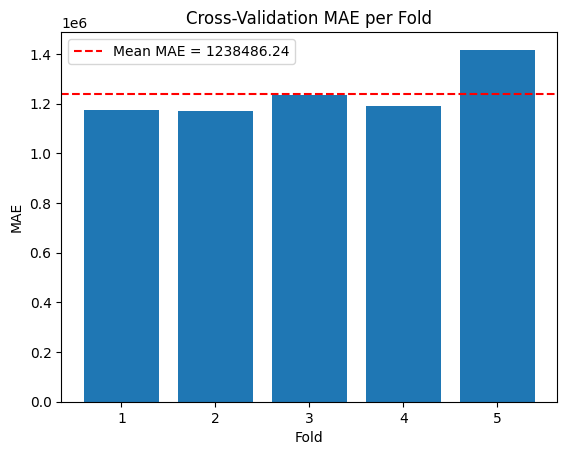

In [107]:
import matplotlib.pyplot as plt

mae_values = -cv_scores  # ubah ke positif
plt.bar(range(1, 6), mae_values)
plt.axhline(np.mean(mae_values), color='red', linestyle='--', label=f'Mean MAE = {np.mean(mae_values):.2f}')
plt.xlabel('Fold')
plt.ylabel('MAE')
plt.title('Cross-Validation MAE per Fold')
plt.legend()
plt.show()

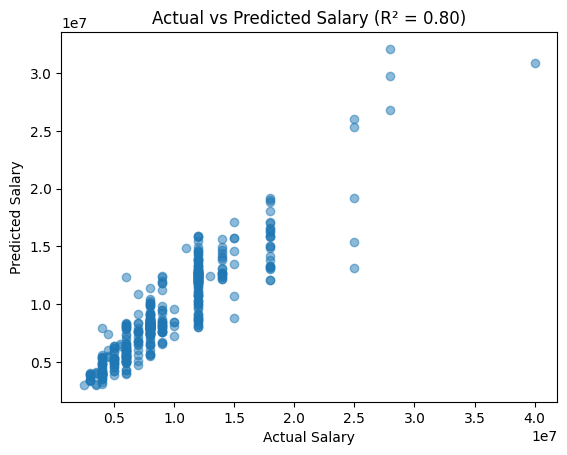

In [109]:
from sklearn.metrics import r2_score

# setelah model fit pada data train-test
y_pred = pipeline.fit(X_train, y_train).predict(X_test)
r2 = r2_score(y_test, y_pred)

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title(f"Actual vs Predicted Salary (R² = {r2:.2f})")
plt.show()


In [101]:
y.describe()

,estimate bottom,estimate up
count,1.160000e+03,1.160000e+03
mean,7.602155e+06,1.182543e+07
std,3.705119e+06,6.002688e+06
min,2.500000e+06,4.000000e+06
25%,5.000000e+06,8.000000e+06
50%,8.000000e+06,1.200000e+07
75%,8.000000e+06,1.200000e+07
max,3.500000e+07,5.500000e+07


##Feature Importance

In [ ]:
import pandas as pd
import numpy as np

# --- 1. Fit ulang pipeline ke seluruh data (setelah cross-validation)
pipeline.fit(X, y)

# --- 2. Ambil nama fitur dari preprocessor
feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()

# --- 3. Ambil model RandomForest untuk setiap target
models = pipeline.named_steps['model'].estimators_

# --- 4. Ambil feature importances dari masing-masing target
importance_bottom = models[0].feature_importances_
importance_up = models[1].feature_importances_

# --- 5. Gabungkan ke DataFrame biar rapi
df_importance = pd.DataFrame({
    'feature': feature_names,
    'importance_bottom': importance_bottom,
    'importance_up': importance_up
})

# --- 6. (Opsional) Tambahkan kolom rata-rata importance
df_importance['mean_importance'] = df_importance[['importance_bottom', 'importance_up']].mean(axis=1)

# --- 7. Urutkan dari yang paling penting
df_importance = df_importance.sort_values('mean_importance', ascending=False)

# --- 8. Lihat top 20 fitur paling penting
print(df_importance.head(20))

In [ ]:
import matplotlib.pyplot as plt

top_n = 15  # tampilkan 15 fitur teratas
plt.figure(figsize=(10, 6))
plt.barh(df_importance['feature'][:top_n], df_importance['mean_importance'][:top_n])
plt.gca().invert_yaxis()
plt.xlabel("Mean Feature Importance")
plt.title("Top 15 Fitur Paling Penting (Rata-rata dari 2 Target)")
plt.show()